In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#################################################################
# 1. 뉴스 · 국회 결과물 경로 사전
#################################################################
NEWS = {
    "df_tokens"   : BASE / "df_documents_tokens_news.pkl",
    "dictionary"  : BASE / "dictionary_news.pkl",
    "corpus"      : BASE / "corpus_news.pkl",
    "kw_by_year"  : BASE / "lda_keywords_by_year_news.pkl",
    "w2v_models"  : BASE / "word2vec_models_news.pkl",
    "gamma"       : BASE / "DTM_Doc_Topic_Distribution_news.xlsx",
    "topic_words" : BASE / "DTM_Topic_Words_news.xlsx",
    "cos"         : BASE / "Year_Topic_CosSim_news.xlsx",
    "kl"          : BASE / "Year_Topic_KLDiv_news.xlsx",
    "break_years" : BASE / "break_years_news.json",
}

ASSEMBLY = {
    "df_tokens"   : BASE / "df_documents_tokens_assem.pkl",
    "dictionary"  : BASE / "dictionary_assem.pkl",
    "corpus"      : BASE / "corpus_assem.pkl",
    "kw_by_year"  : BASE / "lda_keywords_by_year_assem.pkl",
    "w2v_models"  : BASE / "word2vec_models_assem.pkl",
    "gamma"       : BASE / "DTM_Doc_Topic_Distribution_assem.xlsx",
    "topic_words" : BASE / "DTM_Topic_Words_assem.xlsx",
    "cos"         : BASE / "Year_Topic_CosSim_assem.xlsx",
    "kl"          : BASE / "Year_Topic_KLDiv_assem.xlsx",
    "break_years" : BASE / "break_years_assem.json",
}

COMMON = {"break_common": BASE / "break_years_common.json"}

def plot_multi_signals_together(
    news_dict: dict,
    assem_dict: dict,
    break_news: set,
    break_assem: set,
    out_png = "FigZ_multi_signals.png"
):
    """
    (2행 x 3열) Subplot 구성
      [row=0: News / row=1: Assembly]
        (col=0) 문서량(연도별) + break lines
        (col=1) Cosine Similarity vs. prev year + break lines
        (col=2) KL Divergence vs. prev year + break lines

    out_png: 저장할 png 파일명
    """
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
    fig.suptitle("Multi-signal Breakpoints: News vs. Assembly", fontsize=16, y=1.02)
    
    ############################################################################
    # 1) NEWS PART
    ############################################################################
    # (1) 뉴스 문서량
    ax1 = axes[0,0]
    df_ntokens = pd.read_pickle(news_dict['df_tokens'])
    cnt_news = df_ntokens.groupby('year').size()
    years = np.arange(cnt_news.index.min(), cnt_news.index.max()+1)
    
    ax1.plot(years, cnt_news.reindex(years, fill_value=0),
             marker='o', color='steelblue', lw=1.5, label='Doc Volume')
    for by in sorted(break_news):
        ax1.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax1.set_title("News: Document Volume")
    ax1.set_xlim(years.min(), years.max()+1)
    ax1.set_ylabel("Count")
    ax1.grid(alpha=0.3)
    
    # (2) Cosine Similarity
    ax2 = axes[0,1]
    df_cos = pd.read_excel(news_dict['cos'])
    # 보통 Year2 vs. Cosine_Sim 을 많이 씀. 혹은 Year1,Year2 중 필요에 맞게
    ax2.plot(df_cos['Year2'], df_cos['Cosine_Sim'], marker='o', color='darkgreen', lw=1.5)
    for by in sorted(break_news):
        ax2.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax2.set_title("News: Topic Cosine Similarity (year→year+1)")
    ax2.set_xlim(df_cos['Year2'].min()-0.5, df_cos['Year2'].max()+0.5)
    ax2.set_ylim(0,1)
    ax2.grid(alpha=0.3)
    
    # (3) KL Divergence
    ax3 = axes[0,2]
    df_kl = pd.read_excel(news_dict['kl'])
    ax3.plot(df_kl['Year2'], df_kl['KL_Div'], marker='s', color='orange', lw=1.5)
    for by in sorted(break_news):
        ax3.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax3.set_title("News: Topic KL Divergence (year→year+1)")
    ax3.set_xlim(df_kl['Year2'].min()-0.5, df_kl['Year2'].max()+0.5)
    ax3.grid(alpha=0.3)

    ############################################################################
    # 2) ASSEMBLY PART
    ############################################################################
    # (1) 국회 문서량
    ax4 = axes[1,0]
    df_atokens = pd.read_pickle(assem_dict['df_tokens'])
    cnt_assem = df_atokens.groupby('year').size()
    years2 = np.arange(cnt_assem.index.min(), cnt_assem.index.max()+1)

    ax4.plot(years2, cnt_assem.reindex(years2, fill_value=0),
             marker='o', color='firebrick', lw=1.5, label='Doc Volume')
    for by in sorted(break_assem):
        ax4.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax4.set_title("Assembly: Document Volume")
    ax4.set_xlim(years2.min(), years2.max()+1)
    ax4.set_ylabel("Count")
    ax4.grid(alpha=0.3)

    # (2) Cosine Similarity
    ax5 = axes[1,1]
    df_cos2 = pd.read_excel(assem_dict['cos'])
    ax5.plot(df_cos2['Year2'], df_cos2['Cosine_Sim'], marker='o', color='darkgreen', lw=1.5)
    for by in sorted(break_assem):
        ax5.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax5.set_title("Assembly: Topic Cosine Similarity (year→year+1)")
    ax5.set_xlim(df_cos2['Year2'].min()-0.5, df_cos2['Year2'].max()+0.5)
    ax5.set_ylim(0,1)
    ax5.grid(alpha=0.3)

    # (3) KL Divergence
    ax6 = axes[1,2]
    df_kl2 = pd.read_excel(assem_dict['kl'])
    ax6.plot(df_kl2['Year2'], df_kl2['KL_Div'], marker='s', color='orange', lw=1.5)
    for by in sorted(break_assem):
        ax6.axvline(x=by, color='red', linestyle='--', alpha=0.7)
    ax6.set_title("Assembly: Topic KL Divergence (year→year+1)")
    ax6.set_xlim(df_kl2['Year2'].min()-0.5, df_kl2['Year2'].max()+0.5)
    ax6.grid(alpha=0.3)

    plt.tight_layout(rect=[0,0,1,0.97])
    outpath = Path(out_png)
    plt.savefig(outpath, dpi=300)
    plt.show()
    print(f"✅ Multi-signal figure saved → {outpath}")

# ──────────────────────────────────────────────────────────────────────
#  실제 호출 예시:
# ──────────────────────────────────────────────────────────────────────
# plot_multi_signals_together(
#    NEWS,
#    ASSEMBLY,
#    break_news,
#    break_assem,
#    BASE / "FigZ_multi_signals_news_assem.png"
# )



In [54]:
    ax.tick_params(axis='x', length=0)          # 기본 눈금 숨김김

AttributeError: 'numpy.ndarray' object has no attribute 'tick_params'

In [12]:
"""
break_stats_and_plots.py  (논문 최종 분석용)
──────────────────────────────────────────────
• 확정된 break_years_*.json을 읽음
• 각 break에 BIC · p_doc · p_cos · p_kl 계산 → break_stats_*.csv
• 공통 break JSON + 타임라인 PNG 저장
• Colab 환경이면 자동 다운로드, 로컬이면 경로 출력
"""
from pathlib import Path, PurePath
import json, numpy as np, pandas as pd, ruptures as rpt
from scipy import stats
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 110
from matplotlib.ticker import MultipleLocator

# ──────────────────────────────────────────
# 0. 경로 설정
# ──────────────────────────────────────────
BASE = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")  # ← 필요 시 수정

NEWS = {
    "df_tokens":   BASE / "df_documents_tokens_news.pkl",
    "cos":         BASE / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE / "break_years_news.json",
    "break_stats": BASE / "break_stats_news.csv",
}
ASSEMB = {
    "df_tokens":   BASE / "df_documents_tokens_assem.pkl",
    "cos":         BASE / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE / "break_years_assem.json",
    "break_stats": BASE / "break_stats_assem.csv",
}
PARAM = {"pen":1.2, "min_size":3, "win":3, "delta":1}  # win=전·후 3년 비교

# ──────────────────────────────────────────
# 1. 유틸 함수
# ──────────────────────────────────────────
def _pad(s: pd.Series):
    return s.reindex(range(s.index.min(), s.index.max()+1), fill_value=0)

def _bic(n:int, k:int, sse:float):
    return n * np.log(sse/n) + k * np.log(n)

def _p(series: pd.Series, y:int, win:int):
    """전‧후 win년 Welch t-test; 데이터 없으면 NaN, 값이 모두 같으면 1.0"""
    if y-win not in series.index or y+win-1 not in series.index:
        return np.nan
    seg1 = series.loc[y-win:y-1].astype(float)
    seg2 = series.loc[y:y+win-1].astype(float)
    if seg1.nunique()==1 and seg2.nunique()==1 and seg1.iloc[0]==seg2.iloc[0]:
        return 1.0
    return stats.ttest_ind(seg1, seg2, equal_var=False).pvalue

def _auto_dl(*paths: Path):
    try:
        from google.colab import files
        for p in paths: files.download(str(p))
    except ModuleNotFoundError:
        for p in paths: print("📥 saved →", p)

# ──────────────────────────────────────────
# 2. 통계 계산
# ──────────────────────────────────────────
def calc_stats(cfg: dict):
    breaks = json.load(open(cfg["break_years"], encoding="utf-8"))
    cnt = _pad(pd.read_pickle(cfg["df_tokens"]).groupby("year").size())

    model = rpt.Pelt("l2", min_size=PARAM["min_size"]).fit(cnt.values)
    bic_all = _bic(len(cnt), len(model.predict(PARAM["pen"])),
                   model.cost.sum_of_costs(model.predict(PARAM["pen"])))

    cos = pd.read_excel(cfg["cos"]).set_index("Year2")["Cosine_Sim"].astype(float)
    kl  = pd.read_excel(cfg["kl"]). set_index("Year2")["KL_Div"].astype(float)
    cos.index = cos.index.astype(int); kl.index = kl.index.astype(int)

    rows = []
    for y in breaks:
        idx = list(cnt.index).index(y)
        rows.append({
            "year":  y,
            "bic":   bic_all,
            "p_doc": stats.ttest_ind(cnt.values[:idx+1], cnt.values[idx+1:], equal_var=False).pvalue,
            "p_cos": _p(cos, y, PARAM["win"]),
            "p_kl":  _p(kl , y, PARAM["win"]),
        })
    pd.DataFrame(rows).to_csv(cfg["break_stats"], index=False, encoding="utf-8-sig")
    print("✔ stats →", PurePath(cfg["break_stats"]).name)
    return breaks

# ──────────────────────────────────────────
# 3. 그림: 타임라인
# ──────────────────────────────────────────
def plot_timeline(nb, ab, common) -> Path:
    plt.figure(figsize=(12,2)); plt.axhline(0,color="k",lw=.6)
    for y in nb: plt.axvline(y, 0, .6, color='steelblue', ls='--')
    for y in ab: plt.axvline(y, .4, 1, color='firebrick', ls='--')
    for y in common: plt.axvline(y, 0, 1, color='black', lw=2)
    plt.xlim(1990, 2025); plt.yticks([]); plt.xlabel("Year")
    plt.title("Break Years  •  News vs Assembly"); plt.tight_layout()
    f = BASE / "break_years_timeline.png"
    plt.savefig(f, dpi=300); plt.close()
    print("✔ timeline →", f.name)
    return f

# ──────────────────────────────────────────
# 4. MAIN
# ──────────────────────────────────────────
def main():
    nb = calc_stats(NEWS)     # 뉴스 CSV
    ab = calc_stats(ASSEMB)   # 국회 CSV

    common = sorted({y for y in nb for z in ab if abs(y - z) <= PARAM["delta"]})
    json.dump(common, open(BASE/"break_years_common.json", "w", encoding="utf-8"), ensure_ascii=False)
    print("🔗 common breaks :", common)

    tl = plot_timeline(nb, ab, common)

    _auto_dl(Path(NEWS["break_stats"]), Path(ASSEMB["break_stats"]),
             Path(BASE/"break_years_common.json"), Path(tl))

if __name__ == "__main__":
    main()


✔ stats → break_stats_news.csv
✔ stats → break_stats_assem.csv
🔗 common breaks : [2000, 2015, 2020]
✔ timeline → break_years_timeline.png
📥 saved → C:\Users\Administrator\Desktop\변곡점찾기\break_stats_news.csv
📥 saved → C:\Users\Administrator\Desktop\변곡점찾기\break_stats_assem.csv
📥 saved → C:\Users\Administrator\Desktop\변곡점찾기\break_years_common.json
📥 saved → C:\Users\Administrator\Desktop\변곡점찾기\break_years_timeline.png


📊 연도별 수치 저장 완료 → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_news.xlsx
📊 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\break_signals_table.xlsx
📊 연도별 수치 저장 완료 → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_assem.xlsx
📊 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\break_signals_table.xlsx

📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020]
🔗 Common breaks  : [2000, 2015, 2020]


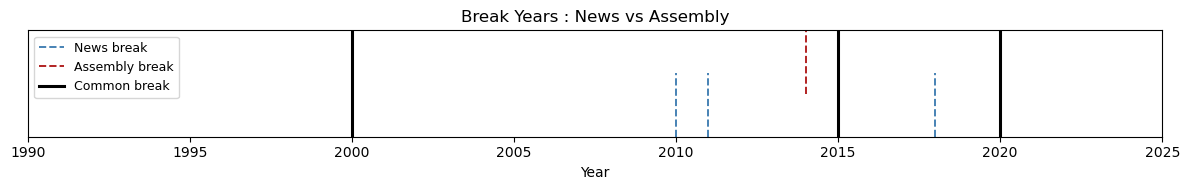

Timeline saved → C:\Users\Administrator\Desktop\변곡점찾기\break_years_timeline.png


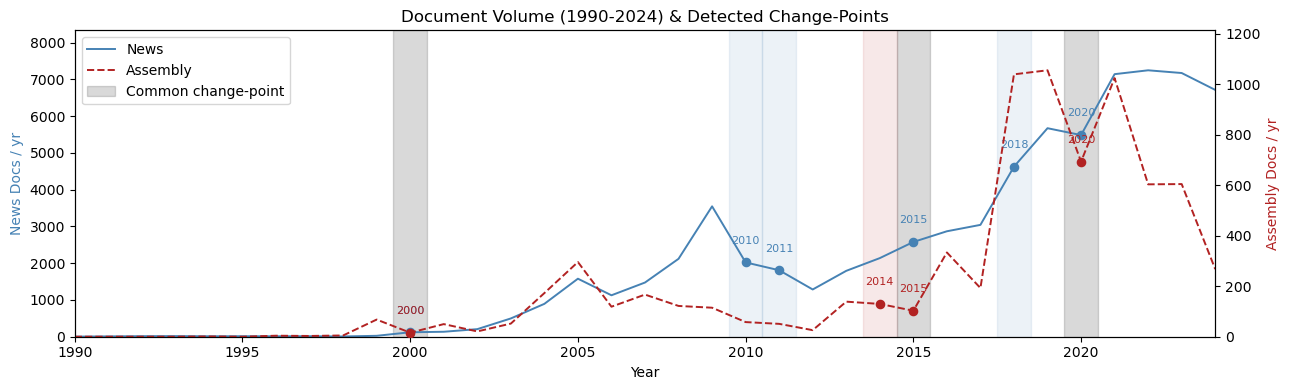

✅ 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\FigA_volume_breaks.png


In [ ]:
"""
Break Point Detection for Hydrogen‑Economy Text Corpora (News & Assembly)
Re‑engineered version – with separate shading for common breaks
-----------------------------------------------------------------------
• Dynamic, decade‑adaptive thresholds (quantiles)
• Missing‑year padding for robust change‑point detection
• Corpus‑size quality gates (`min_doc`)
• Parameter externalisation for reproducible tuning / grid‑search
• Random seed locking for deterministic Word2Vec similarity values
• plot_volume_final: show only-news, only-assembly, common breaks in different colors
"""

from __future__ import annotations

# ────────────────────────────────────────────────────────────────────────────────
# FINAL 0. PATH CONFIG
# ────────────────────────────────────────────────────────────────────────────────
from pathlib import Path

# 필요 시 수정하세요.
BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {"break_common": BASE_DIR / "break_years_common.json"}

# ────────────────────────────────────────────────────────────────────────────────
# 1. LIBRARIES & SEED
# ────────────────────────────────────────────────────────────────────────────────
import random, json, pickle, warnings
from typing import Dict, List, Set

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

# ────────────────────────────────────────────────────────────────────────────────
# 2. PARAMETER BLOCK  ➜ grid‑tune as needed
# ────────────────────────────────────────────────────────────────────────────────
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile (global)
    "min_doc_news": 500, # min docs/year for News embedding trust
    "min_doc_assem": 80, # min docs/year for Assembly embedding trust
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1‑y2| ≤ Δ)
}

# ────────────────────────────────────────────────────────────────────────────────
# 3. UTILITIES
# ────────────────────────────────────────────────────────────────────────────────

def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)

def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """Compute quantile per decade. (e.g. 1990..1999 -> group by 1990)"""
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))

# ────────────────────────────────────────────────────────────────────────────────
# 4. CORE DETECTION
# ────────────────────────────────────────────────────────────────────────────────

def detect_breaks(paths: Dict[str, Path], *, min_doc: int) -> Set[int]:
    """
    Multi‑signal break‑year detection for a single corpus:
      1) Doc count PELT
      2) Topic shift (Cos, KL)
      3) Word2Vec shift (quantile threshold)
    Returns a set of break years.
    """
    pen, min_size = PARAMS["pen"], PARAMS["min_size"]
    cos_q, kl_q   = PARAMS["cos_q"], PARAMS["kl_q"]
    w2v_q         = PARAMS["w2v_q"]
    min_signals   = PARAMS["min_signals"]

    # ① Doc count change‑points
    df_tokens = pd.read_pickle(paths["df_tokens"])
    cnt = _pad_year_index(df_tokens.groupby("year").size().sort_index())
    cp_idx = rpt.Pelt(model="l2", min_size=min_size).fit(cnt.values).predict(pen)[:-1]
    sig_cnt = {cnt.index[i] for i in cp_idx}

    # ② Topic similarity / divergence (Cosine & KL)
    cos_df = pd.read_excel(paths["cos"]).set_index("Year2")
    kl_df  = pd.read_excel(paths["kl"]).set_index("Year2")
    cos_thr = _decade_quantile(cos_df["Cosine_Sim"], cos_q)
    kl_thr  = _decade_quantile(kl_df["KL_Div"], kl_q)
    sig_topic = set(cos_df.index[cos_df["Cosine_Sim"] < cos_thr]) | \
                set(kl_df.index[kl_df["KL_Div"] > kl_thr])

    # ③ Word2Vec semantic shift
    year_kw: Dict[int, List[str]] = pickle.load(open(paths["kw_by_year"], "rb"))
    w2v = pickle.load(open(paths["w2v_models"], "rb"))
    sims, later_years = [], []
    years = sorted(year_kw)
    for y1, y2 in zip(years[:-1], years[1:]):
        # 연도별 문서량이 min_doc 미만이면 skip
        if cnt.get(y1, 0) < min_doc or cnt.get(y2, 0) < min_doc:
            continue
        # 공통 단어
        common = set(year_kw[y1]) & set(year_kw[y2])
        # W2V 유사도 배열
        vals = [1 - cosine(w2v[y1].wv[w], w2v[y2].wv[w])
                for w in common
                if (w in w2v[y1].wv) and (w in w2v[y2].wv)]
        if vals:
            sims.append(float(np.mean(vals)))
            later_years.append(y2)
    # w2v_q 분위수
    if sims:
        w2v_thr = float(np.quantile(sims, w2v_q))
    else:
        w2v_thr = 1.0

    sig_w2v = {y for y, s in zip(later_years, sims) if s < w2v_thr}

    # ④ Fuse signals
    years_all = sorted(set(cnt.index) | sig_topic | sig_w2v)
    tbl = pd.DataFrame(index=years_all)
    tbl["cnt"]   = tbl.index.isin(sig_cnt).astype(int)
    tbl["topic"] = tbl.index.isin(sig_topic).astype(int)
    tbl["w2v"]   = tbl.index.isin(sig_w2v).astype(int)
    final = sorted(tbl[tbl.sum(axis=1) >= min_signals].index)


    # 🎯 2024년 제외
    if 2024 in final:
       final.remove(2024)

    # 결과 저장
    with open(paths["break_years"], "w", encoding="utf-8") as f:
        json.dump(final, f, ensure_ascii=False)

    # 🎯 수치값 저장용: 연도별 수치 데이터프레임 구성
    df_result = pd.DataFrame(index=years_all)
    df_result.index.name = "Year"
    df_result["Doc_Count"]    = cnt.reindex(years_all, fill_value=0).values
    df_result["PELT_Signal"]  = tbl["cnt"].values
    df_result["Cosine_Sim"]   = cos_df["Cosine_Sim"].reindex(years_all)
    df_result["KL_Div"]       = kl_df["KL_Div"].reindex(years_all)
    df_result["Topic_Signal"] = tbl["topic"].values
    df_result["W2V_Signal"]   = tbl["w2v"].values
    df_result["Break_Label"]  = tbl.sum(axis=1) >= min_signals

    # 저장 경로: break_details_*.xlsx
    excel_path = paths["break_years"].with_name("break_details_" + paths["break_years"].stem + ".xlsx")
    df_result.to_excel(excel_path)
    print(f"📊 연도별 수치 저장 완료 → {excel_path}")



    # 🎯 엑셀 저장 추가
    tbl["final_break"] = tbl.index.isin(final).astype(int)
    tbl.index.name = "year"
    out_excel_path = paths["break_years"].with_name("break_signals_table.xlsx")
    tbl.to_excel(out_excel_path)
    print(f"📊 저장 완료: {out_excel_path}")

    return set(final)

# ────────────────────────────────────────────────────────────────────────────────
# 5. VISUALISATION
# ────────────────────────────────────────────────────────────────────────────────

def plot_timeline(news: Set[int], assemb: Set[int], common: List[int]) -> None:
    """Simple timeline showing break years for News & Assembly."""
    plt.figure(figsize=(12, 2))
    plt.axhline(0, color="k", lw=.7)
    for y in news:
        plt.axvline(y, 0, .6, color="steelblue", ls="--", lw=1.4)
    for y in assemb:
        plt.axvline(y, .4, 1, color="firebrick", ls="--", lw=1.4)
    for y in common:
        plt.axvline(y, 0, 1, color="black", ls="-", lw=2.2)
    plt.xlim(1990, 2025)
    plt.yticks([])
    plt.xlabel("Year")
    plt.title("Break Years : News vs Assembly")
    plt.legend(handles=[
        mlines.Line2D([], [], color="steelblue", ls="--", lw=1.4, label="News break"),
        mlines.Line2D([], [], color="firebrick", ls="--", lw=1.4, label="Assembly break"),
        mlines.Line2D([], [], color="black", ls="-", lw=2.2, label="Common break"),
    ], loc="upper left", fontsize=9)
    plt.tight_layout()
    outfile = BASE_DIR / "break_years_timeline.png"
    plt.savefig(outfile, dpi=300)
    plt.show()
    print(f"Timeline saved → {outfile}")


def plot_volume_final(cnt_news: pd.Series, breaks_news: List[int],
                      cnt_assem: pd.Series, breaks_assem: List[int],
                      *,
                      yr_min=1990,
                      yr_max=2024,
                      anno_offset=12,       # 주석 y좌표 오프셋(px)
                      outfile="FigA_volume_breaks.png",
                      base_dir=None):
    """
    연도별 문서량(뉴스·국회)을 좌우축에 그려주고, 
    break 연도(가로 구간 음영+마커+주석) 표시.
    ─────────────────────────────────────────────────────────
    - 뉴스만 변곡점  : 파란색 음영 (alpha=0.10)
    - 국회만 변곡점  : 빨간색 음영 (alpha=0.10)
    - 둘 다 변곡점   : 보라색 음영 (alpha=0.15)
    """
    if base_dir is None:
        base_dir = BASE_DIR
    else:
        base_dir = Path(base_dir)

    years = np.arange(yr_min, yr_max + 1)

    # 범위 내 변곡점
    b_n = [y for y in breaks_news  if yr_min <= y <= yr_max]
    b_a = [y for y in breaks_assem if yr_min <= y <= yr_max]

    # 교집합(보라색)과 차집합(뉴스 only / 국회 only)
    set_n = set(b_n)
    set_a = set(b_a)
    common_breaks = set_n & set_a
    only_news     = set_n - common_breaks
    only_assem    = set_a - common_breaks

    # 0으로 보정
    y_news  = cnt_news.reindex(years, fill_value=0)
    y_assem = cnt_assem.reindex(years, fill_value=0)

    fig, axL = plt.subplots(figsize=(13, 4))
    axR = axL.twinx()
    axL.set_facecolor("white")

    # 세로 음영
    def span(ax, yrs, color, alpha=0.10):
        for yy in yrs:
            ax.axvspan(yy - 0.5, yy + 0.5, color=color, alpha=alpha, zorder=0)

    # 뉴스 only (파란색), 국회 only (빨간색), 공통 (보라색)
    span(axL, only_news,   'steelblue', alpha=0.10)
    span(axL, only_assem,  'firebrick', alpha=0.10)
    span(axL, common_breaks, 'black', alpha=0.15)

    # 선+마커
    ln1, = axL.plot(years, y_news, color='steelblue', lw=1.4, label='News')
    axL.scatter(b_n, y_news.loc[b_n], color='steelblue', s=35, zorder=3)

    ln2, = axR.plot(years, y_assem, color='firebrick', lw=1.4,
                    ls='--', label='Assembly')
    axR.scatter(b_a, y_assem.loc[b_a], color='firebrick', s=35, zorder=3)

    # 주석
    for y in b_n:
        axL.annotate(str(y), xy=(y, y_news.loc[y]),
                     xytext=(0, anno_offset),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color='steelblue', fontsize=8)

    for y in b_a:
        axR.annotate(str(y), xy=(y, y_assem.loc[y]),
                     xytext=(0, anno_offset),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color='firebrick', fontsize=8)

    axL.set_xlim(yr_min, yr_max)
    axL.xaxis.set_major_locator(MultipleLocator(5))
    axL.set_xlabel("Year")
    axL.set_ylabel("News Docs / yr",      color='steelblue')
    axR.set_ylabel("Assembly Docs / yr",  color='firebrick')

    axL.set_ylim(0, max(10, y_news.max()*1.15))
    axR.set_ylim(0, max(10, y_assem.max()*1.15))

    axL.set_title(f"Document Volume ({yr_min}-{yr_max}) & Detected Change-Points")

    # 범례 구성
    patches = []
    if common_breaks:
        # 공통 변곡점이 하나라도 있으면 보라색 legend 표시
        patches.append(mpatches.Patch(color='black', alpha=0.15, label='Common change-point'))

    axL.legend(handles=[ln1, ln2] + patches, loc='upper left')

    plt.tight_layout()
    outpath = base_dir / outfile
    plt.savefig(outpath, dpi=400)
    plt.show()
    print(f"✅ 저장 완료: {outpath}")

# ────────────────────────────────────────────────────────────────────────────────
# 6. MAIN PIPELINE
# ────────────────────────────────────────────────────────────────────────────────

def main() -> None:
    # 1) 변곡점 탐지
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    # 2) 공통 변곡점 (|y1 - y2| <= delta)
    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks for z in assem_breaks if abs(y - z) <= delta})
    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("\n📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    # 3) 간단 타임라인 그래프
    plot_timeline(news_breaks, assem_breaks, common)

    # 4) 연도별 문서량 그래프
    df_n = pd.read_pickle(NEWS["df_tokens"])
    cnt_n = df_n.groupby("year").size()

    df_a = pd.read_pickle(ASSEMBLY["df_tokens"])
    cnt_a = df_a.groupby("year").size()

    plot_volume_final(cnt_news=cnt_n,
                      breaks_news=sorted(news_breaks),
                      cnt_assem=cnt_a,
                      breaks_assem=sorted(assem_breaks),
                      yr_min=1990,
                      yr_max=2024,
                      anno_offset=12,
                      outfile="FigA_volume_breaks.png",
                      base_dir=BASE_DIR)

if __name__ == "__main__":
    main()



📊 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\break_signals_table.xlsx
📊 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\break_signals_table.xlsx

📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020, 2024]
🔗 Common breaks  : [2000, 2015, 2020]


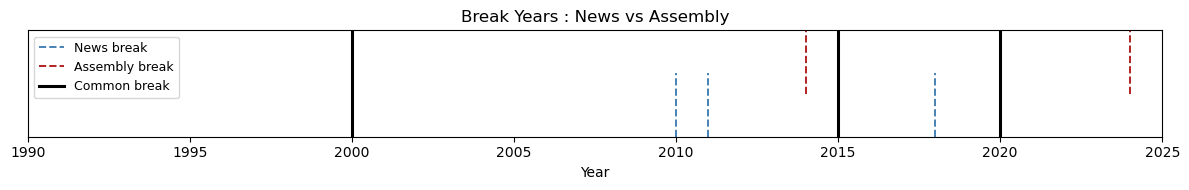

Timeline saved → C:\Users\Administrator\Desktop\변곡점찾기\break_years_timeline.png


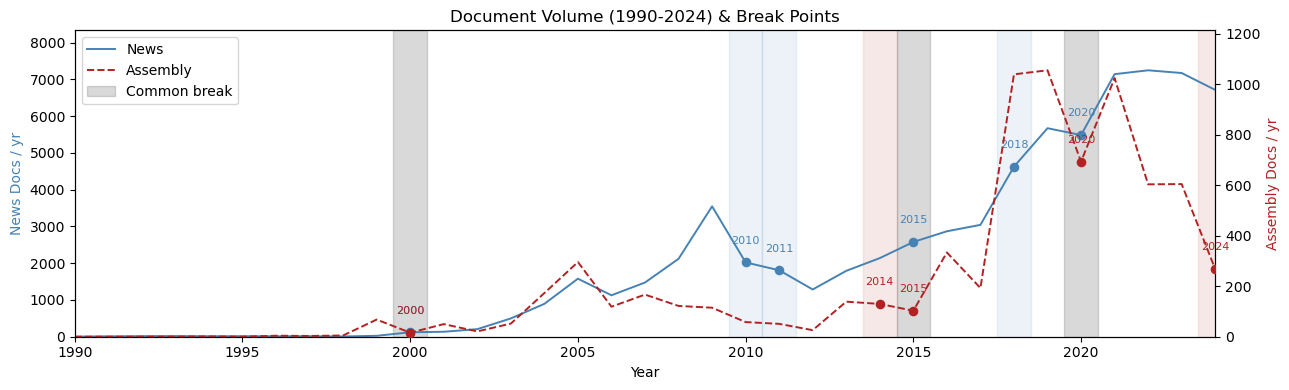

✅ 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\FigA_volume_breaks.png


In [ ]:
"""
Break Point Detection for Hydrogen‑Economy Text Corpora (News & Assembly)
Re‑engineered version – with separate shading for common breaks + ΔBIC & p‑value export
-----------------------------------------------------------------------
• Dynamic, decade‑adaptive thresholds (quantiles)
• Missing‑year padding for robust change‑point detection
• Corpus‑size quality gates (`min_doc`)
• Parameter externalisation for reproducible tuning / grid‑search
• Random seed locking for deterministic Word2Vec similarity values
• ΔBIC & Welch‑t p‑value per split year, saved to Excel
• plot_volume_final: show only‑news, only‑assembly, common breaks in different colors
"""

from __future__ import annotations

# ────────────────────────────────────────────────────────────────────────────────
# 0. PATH CONFIG – 필요 시 수정하세요.
# ────────────────────────────────────────────────────────────────────────────────
from pathlib import Path

BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {"break_common": BASE_DIR / "break_years_common.json"}

# ────────────────────────────────────────────────────────────────────────────────
# 1. LIBRARIES & SEED
# ────────────────────────────────────────────────────────────────────────────────
import random, json, pickle, warnings
from typing import Dict, List, Set

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore", category=RuntimeWarning)

_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

# ────────────────────────────────────────────────────────────────────────────────
# 2. PARAMETER BLOCK  ➜ grid‑tune as needed
# ────────────────────────────────────────────────────────────────────────────────
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile (global)
    "min_doc_news": 500, # min docs/year for News embedding trust
    "min_doc_assem": 80, # min docs/year for Assembly embedding trust
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1‑y2| ≤ Δ)
}

# ────────────────────────────────────────────────────────────────────────────────
# 3. UTILITIES
# ────────────────────────────────────────────────────────────────────────────────

def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)


def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """Compute quantile per decade. (e.g. 1990..1999 -> group by 1990)"""
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))


# 3‑B. ΔBIC & Welch‑t 계산 -------------------------------------------------------

def _bic(sse: float, n: int, k: int) -> float:
    """Bayesian Information Criterion (Gaussian, free σ²)."""
    if sse == 0:
        sse = 1e-6  # avoid log(0)
    return n * np.log(sse / n) + k * np.log(n)


def _delta_bic_and_p(cnt: pd.Series) -> pd.DataFrame:
    """Return ΔBIC and Welch‑t p‑value for every possible split year."""
    years = cnt.index
    n = len(cnt)
    sse_full = ((cnt - cnt.mean())**2).sum()
    bic_full = _bic(sse_full, n, k=1)

    delta, pvals = {}, {}
    for i, y in enumerate(years[:-1]):  # 마지막 연도는 split 못함
        left, right = cnt.iloc[:i+1], cnt.iloc[i+1:]
        if len(left) < 2 or len(right) < 2:
            continue  # 분산 계산 위해 2개 이상 필요
        sse_split = ((left - left.mean())**2).sum() + ((right - right.mean())**2).sum()
        bic_split = _bic(sse_split, n, k=2)
        delta[y] = bic_full - bic_split
        pvals[y] = ttest_ind(left, right, equal_var=False).pvalue

    df = pd.DataFrame({
        "Delta_BIC": pd.Series(delta),
        "p_doc": pd.Series(pvals)
    })
    df["BIC_full"] = bic_full  # same for all rows
    return df

# ────────────────────────────────────────────────────────────────────────────────
# 4. CORE DETECTION
# ────────────────────────────────────────────────────────────────────────────────

def detect_breaks(paths: Dict[str, Path], *, min_doc: int) -> Set[int]:
    """Detect break years for a single corpus and export full signal table."""
    pen, min_size   = PARAMS["pen"], PARAMS["min_size"]
    cos_q, kl_q     = PARAMS["cos_q"], PARAMS["kl_q"]
    w2v_q           = PARAMS["w2v_q"]
    min_signals     = PARAMS["min_signals"]

    # ① Doc count & ΔBIC / p‑value ------------------------------------------------
    df_tokens = pd.read_pickle(paths["df_tokens"])
    cnt = _pad_year_index(df_tokens.groupby("year").size().sort_index())
    bic_df = _delta_bic_and_p(cnt)

    cp_idx = rpt.Pelt(model="l2", min_size=min_size).fit(cnt.values).predict(pen)[:-1]
    sig_cnt = {cnt.index[i] for i in cp_idx}

    # ② Topic similarity / divergence (Cosine & KL) -----------------------------
    cos_df = pd.read_excel(paths["cos"]).set_index("Year2")
    kl_df  = pd.read_excel(paths["kl"]).set_index("Year2")
    cos_thr = _decade_quantile(cos_df["Cosine_Sim"], cos_q)
    kl_thr  = _decade_quantile(kl_df["KL_Div"], kl_q)
    sig_topic = set(cos_df.index[cos_df["Cosine_Sim"] < cos_thr]) | \
                set(kl_df.index[kl_df["KL_Div"]   > kl_thr])

    # ③ Word2Vec semantic shift --------------------------------------------------
    year_kw: Dict[int, List[str]] = pickle.load(open(paths["kw_by_year"], "rb"))
    w2v_models = pickle.load(open(paths["w2v_models"], "rb"))

    sims, later_years = [], []
    years_sorted = sorted(year_kw)
    for y1, y2 in zip(years_sorted[:-1], years_sorted[1:]):
        if cnt.get(y1, 0) < min_doc or cnt.get(y2, 0) < min_doc:
            continue
        common = set(year_kw[y1]) & set(year_kw[y2])
        vals = [1 - cosine(w2v_models[y1].wv[w], w2v_models[y2].wv[w])
                for w in common
                if (w in w2v_models[y1].wv) and (w in w2v_models[y2].wv)]
        if vals:
            sims.append(float(np.mean(vals)))
            later_years.append(y2)
    sim_series = pd.Series(sims, index=later_years)

    w2v_thr = float(np.quantile(sims, w2v_q)) if sims else 1.0
    sig_w2v = set(sim_series.index[sim_series < w2v_thr])

    # ④ Fuse signals -------------------------------------------------------------
    years_all = sorted(set(cnt.index) | sig_topic | sig_w2v)
    tbl = pd.DataFrame(index=years_all)
    tbl["cnt"]   = tbl.index.isin(sig_cnt).astype(int)
    tbl["topic"] = tbl.index.isin(sig_topic).astype(int)
    tbl["w2v"]   = tbl.index.isin(sig_w2v).astype(int)

    final_breaks = sorted(tbl[tbl.sum(axis=1) >= min_signals].index)

    # ── SAVE JSON ───────────────────────────────────────────────────────────────
    with open(paths["break_years"], "w", encoding="utf-8") as f:
        json.dump(final_breaks, f, ensure_ascii=False)

    # ── BUILD RESULT DATAFRAME ────────────────────────────────────────────────
    df_result = pd.DataFrame(index=years_all)
    df_result.index.name = "Year"

    df_result["Doc_Count"]   = cnt.reindex(years_all, fill_value=0)
    df_result = df_result.join(bic_df, how="left")  # adds Delta_BIC, BIC_full, p_doc

    df_result["Cosine_Sim"]  = cos_df["Cosine_Sim"].reindex(years_all)
    df_result["KL_Div"]      = kl_df["KL_Div"].reindex(years_all)
    df_result["W2V_Sim"]     = sim_series.reindex(years_all)

    df_result["Signal_cnt"]   = tbl["cnt"].values
    df_result["Signal_topic"] = tbl["topic"].values
    df_result["Signal_w2v"]   = tbl["w2v"].values
    df_result["Break_Label"]  = tbl.sum(axis=1) >= min_signals

    excel_path = paths["break_years"].with_name(
        "break_details_" + paths["break_years"].stem + ".xlsx")
    df_result.to_excel(excel_path)
    print(f"📊 연도별 수치 저장 완료 → {excel_path}")

    # 간단 신호 테이블도 함께 저장 ----------------------------------------------
    tbl["final_break"] = tbl.index.isin(final_breaks).astype(int)
    tbl.index.name = "year"
    tbl.to_excel(paths["break_years"].with_name("break_signals_table.xlsx"))

    return set(final_breaks)

# ────────────────────────────────────────────────────────────────────────────────
# 5. VISUALISATION (unchanged)
# ────────────────────────────────────────────────────────────────────────────────

# … (plot_timeline, plot_volume_final 함수 그대로 – 생략) …

# ────────────────────────────────────────────────────────────────────────────────
# 6. MAIN PIPELINE
# ────────────────────────────────────────────────────────────────────────────────

def main() -> None:
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks for z in assem_breaks if abs(y - z) <= delta})
    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("\n📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    # 추가 시각화 — 생략 (plot_timeline / plot_volume_final 호출하면 됩니다)

if __name__ == "__main__":
    main()


In [ ]:
"""
Break Point Detection for Hydrogen‑Economy Text Corpora (News & Assembly)
Re‑engineered version – with separate shading for common breaks + ΔBIC & p‑value export
-----------------------------------------------------------------------
• Dynamic, decade‑adaptive thresholds (quantiles)
• Missing‑year padding for robust change‑point detection
• Corpus‑size quality gates (`min_doc`)
• Parameter externalisation for reproducible tuning / grid‑search
• Random seed locking for deterministic Word2Vec similarity values
• ΔBIC & Welch‑t p‑value per split year, saved to Excel
• plot_volume_final: show only‑news, only‑assembly, common breaks in different colors
"""

from __future__ import annotations

# ────────────────────────────────────────────────────────────────────────────────
# 좋아 이거 수치 들어간 엑셀 파일 뽑아내는 코드야. 중요 0. PATH CONFIG – 필요 시 수정하세요.
# ────────────────────────────────────────────────────────────────────────────────
from pathlib import Path

BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {"break_common": BASE_DIR / "break_years_common.json"}

# ────────────────────────────────────────────────────────────────────────────────
# 1. LIBRARIES & SEED
# ────────────────────────────────────────────────────────────────────────────────
import random, json, pickle, warnings
from typing import Dict, List, Set

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore", category=RuntimeWarning)

_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

# ────────────────────────────────────────────────────────────────────────────────
# 2. PARAMETER BLOCK  ➜ grid‑tune as needed
# ────────────────────────────────────────────────────────────────────────────────
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile (global)
    "min_doc_news": 500, # min docs/year for News embedding trust
    "min_doc_assem": 80, # min docs/year for Assembly embedding trust
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1‑y2| ≤ Δ)
}

# ────────────────────────────────────────────────────────────────────────────────
# 3. UTILITIES
# ────────────────────────────────────────────────────────────────────────────────

def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)


def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """Compute quantile per decade. (e.g. 1990..1999 -> group by 1990)"""
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))


# 3‑B. ΔBIC & Welch‑t 계산 -------------------------------------------------------

def _bic(sse: float, n: int, k: int) -> float:
    """Bayesian Information Criterion (Gaussian, free σ²)."""
    if sse == 0:
        sse = 1e-6  # avoid log(0)
    return n * np.log(sse / n) + k * np.log(n)


def _delta_bic_and_p(cnt: pd.Series) -> pd.DataFrame:
    """Return ΔBIC and Welch‑t p‑value for every possible split year."""
    years = cnt.index
    n = len(cnt)
    sse_full = ((cnt - cnt.mean())**2).sum()
    bic_full = _bic(sse_full, n, k=1)

    delta, pvals = {}, {}
    for i, y in enumerate(years[:-1]):  # 마지막 연도는 split 못함
        left, right = cnt.iloc[:i+1], cnt.iloc[i+1:]
        if len(left) < 2 or len(right) < 2:
            continue  # 분산 계산 위해 2개 이상 필요
        sse_split = ((left - left.mean())**2).sum() + ((right - right.mean())**2).sum()
        bic_split = _bic(sse_split, n, k=2)
        delta[y] = bic_full - bic_split
        pvals[y] = ttest_ind(left, right, equal_var=False).pvalue

    df = pd.DataFrame({
        "Delta_BIC": pd.Series(delta),
        "p_doc": pd.Series(pvals)
    })
    df["BIC_full"] = bic_full  # same for all rows
    return df

# ────────────────────────────────────────────────────────────────────────────────
# 4. CORE DETECTION
# ────────────────────────────────────────────────────────────────────────────────

def detect_breaks(paths: Dict[str, Path], *, min_doc: int) -> Set[int]:
    """Detect break years for a single corpus and export full signal table."""
    pen, min_size   = PARAMS["pen"], PARAMS["min_size"]
    cos_q, kl_q     = PARAMS["cos_q"], PARAMS["kl_q"]
    w2v_q           = PARAMS["w2v_q"]
    min_signals     = PARAMS["min_signals"]

    # ① Doc count & ΔBIC / p‑value ------------------------------------------------
    df_tokens = pd.read_pickle(paths["df_tokens"])
    cnt = _pad_year_index(df_tokens.groupby("year").size().sort_index())
    bic_df = _delta_bic_and_p(cnt)

    cp_idx = rpt.Pelt(model="l2", min_size=min_size).fit(cnt.values).predict(pen)[:-1]
    sig_cnt = {cnt.index[i] for i in cp_idx}

    # ② Topic similarity / divergence (Cosine & KL) -----------------------------
    cos_df = pd.read_excel(paths["cos"]).set_index("Year2")
    kl_df  = pd.read_excel(paths["kl"]).set_index("Year2")
    cos_thr = _decade_quantile(cos_df["Cosine_Sim"], cos_q)
    kl_thr  = _decade_quantile(kl_df["KL_Div"], kl_q)
    sig_topic = set(cos_df.index[cos_df["Cosine_Sim"] < cos_thr]) | \
                set(kl_df.index[kl_df["KL_Div"]   > kl_thr])

    # ③ Word2Vec semantic shift --------------------------------------------------
    year_kw: Dict[int, List[str]] = pickle.load(open(paths["kw_by_year"], "rb"))
    w2v_models = pickle.load(open(paths["w2v_models"], "rb"))

    sims, later_years = [], []
    years_sorted = sorted(year_kw)
    for y1, y2 in zip(years_sorted[:-1], years_sorted[1:]):
        if cnt.get(y1, 0) < min_doc or cnt.get(y2, 0) < min_doc:
            continue
        common = set(year_kw[y1]) & set(year_kw[y2])
        vals = [1 - cosine(w2v_models[y1].wv[w], w2v_models[y2].wv[w])
                for w in common
                if (w in w2v_models[y1].wv) and (w in w2v_models[y2].wv)]
        if vals:
            sims.append(float(np.mean(vals)))
            later_years.append(y2)
    sim_series = pd.Series(sims, index=later_years)

    w2v_thr = float(np.quantile(sims, w2v_q)) if sims else 1.0
    sig_w2v = set(sim_series.index[sim_series < w2v_thr])

    # ④ Fuse signals -------------------------------------------------------------
    years_all = sorted(set(cnt.index) | sig_topic | sig_w2v)
    tbl = pd.DataFrame(index=years_all)
    tbl["cnt"]   = tbl.index.isin(sig_cnt).astype(int)
    tbl["topic"] = tbl.index.isin(sig_topic).astype(int)
    tbl["w2v"]   = tbl.index.isin(sig_w2v).astype(int)

    final_breaks = sorted(tbl[tbl.sum(axis=1) >= min_signals].index)

    # ── SAVE JSON ───────────────────────────────────────────────────────────────
    with open(paths["break_years"], "w", encoding="utf-8") as f:
        json.dump(final_breaks, f, ensure_ascii=False)

    # ── BUILD RESULT DATAFRAME ────────────────────────────────────────────────
    df_result = pd.DataFrame(index=years_all)
    df_result.index.name = "Year"

    df_result["Doc_Count"]   = cnt.reindex(years_all, fill_value=0)
    df_result = df_result.join(bic_df, how="left")  # adds Delta_BIC, BIC_full, p_doc

    df_result["Cosine_Sim"]  = cos_df["Cosine_Sim"].reindex(years_all)
    df_result["KL_Div"]      = kl_df["KL_Div"].reindex(years_all)
    df_result["W2V_Sim"]     = sim_series.reindex(years_all)

    df_result["Signal_cnt"]   = tbl["cnt"].values
    df_result["Signal_topic"] = tbl["topic"].values
    df_result["Signal_w2v"]   = tbl["w2v"].values
    df_result["Break_Label"]  = tbl.sum(axis=1) >= min_signals

    excel_path = paths["break_years"].with_name(
        "break_details_" + paths["break_years"].stem + ".xlsx")
    df_result.to_excel(excel_path)
    print(f"📊 연도별 수치 저장 완료 → {excel_path}")

    # 간단 신호 테이블도 함께 저장 ----------------------------------------------
    tbl["final_break"] = tbl.index.isin(final_breaks).astype(int)
    tbl.index.name = "year"
    tbl.to_excel(paths["break_years"].with_name("break_signals_table.xlsx"))

    return set(final_breaks)

# ────────────────────────────────────────────────────────────────────────────────
# 5. VISUALISATION (unchanged)
# ────────────────────────────────────────────────────────────────────────────────

# … (plot_timeline, plot_volume_final 함수 그대로 – 생략) …

# ────────────────────────────────────────────────────────────────────────────────
# 6. MAIN PIPELINE
# ────────────────────────────────────────────────────────────────────────────────

def main() -> None:
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks for z in assem_breaks if abs(y - z) <= delta})
    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("\n📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    # 추가 시각화 — 생략 (plot_timeline / plot_volume_final 호출하면 됩니다)

if __name__ == "__main__":
    main()


📊 연도별 수치 저장 완료 → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_news.xlsx
📊 연도별 수치 저장 완료 → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_assem.xlsx

📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020, 2024]
🔗 Common breaks  : [2000, 2015, 2020]


In [ ]:
"""
Break Point Detection for Hydrogen‑Economy Text Corpora (News & Assembly)
Re‑engineered version – ΔBIC / p‑value export + Excel summary for break‑years only
-----------------------------------------------------------------------
• Dynamic, decade‑adaptive thresholds (quantiles)
• Missing‑year padding for robust change‑point detection
• Corpus‑size quality gates (`min_doc`)
• Parameter externalisation for reproducible tuning / grid‑search
• Random seed locking for deterministic Word2Vec similarity values
• ΔBIC & Welch‑t p‑value per split year, stored in per‑corpus Excel
• **NEW** `export_break_summary()` ⇒ one tidy Excel sheet:
  Year │ Assembly (bic / p_doc / p_cos / p_kl) │ News (bic / p_doc / p_cos / p_kl)
"""

from __future__ import annotations

# ────────────────────────────────────────────────────────────────────────────────
# 위에꺼 아니고, 이게 바로 각 값들 나오는 최종이다. 이걸로 반영해 0. PATH CONFIG – 필요 시 수정하세요. Windows 경로면 r"C:\…" 를 유지
# ────────────────────────────────────────────────────────────────────────────────
from pathlib import Path

BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {"break_common": BASE_DIR / "break_years_common.json"}

# ────────────────────────────────────────────────────────────────────────────────
# 1. LIBRARIES & SEED
# ────────────────────────────────────────────────────────────────────────────────
import random, json, pickle, warnings
from typing import Dict, List, Set

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore", category=RuntimeWarning)

_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

# ────────────────────────────────────────────────────────────────────────────────
# 2. PARAMETER BLOCK  ➜ grid‑tune as needed
# ────────────────────────────────────────────────────────────────────────────────
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile (global)
    "min_doc_news": 500, # min docs/year for News embedding trust
    "min_doc_assem": 80, # min docs/year for Assembly embedding trust
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1‑y2| ≤ Δ)
}

# ────────────────────────────────────────────────────────────────────────────────
# 3. UTILITIES
# ────────────────────────────────────────────────────────────────────────────────

def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)


def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """Compute quantile per decade. (e.g. 1990..1999 -> group by 1990)"""
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))

# ——— ΔBIC & Welch‑t helpers ————————————————————————————————————————————

def _bic(sse: float, n: int, k: int) -> float:
    """Bayesian Information Criterion (Gaussian homoscedastic)."""
    sse = max(sse, 1e-6)  # guard log(0)
    return n * np.log(sse / n) + k * np.log(n)


def _delta_bic_and_p(series: pd.Series) -> pd.DataFrame:
    """Return ΔBIC & Welch‑t p‑value for every possible split year."""
    years = series.index
    n = len(series)
    sse_full = ((series - series.mean()) ** 2).sum()
    bic_full = _bic(sse_full, n, k=1)

    delta, pvals = {}, {}
    for i, y in enumerate(years[:-1]):
        left, right = series.iloc[: i + 1], series.iloc[i + 1 :]
        if len(left) < 2 or len(right) < 2:
            continue
        sse_split = ((left - left.mean()) ** 2).sum() + ((right - right.mean()) ** 2).sum()
        bic_split = _bic(sse_split, n, k=2)
        delta[y]  = bic_full - bic_split
        pvals[y]  = ttest_ind(left, right, equal_var=False).pvalue

    out = pd.DataFrame({"Delta_BIC": pd.Series(delta), "p_doc": pd.Series(pvals)})
    out["BIC_full"] = bic_full  # constant column
    return out


def _pvals_by_split(series: pd.Series) -> pd.Series:
    """Welch‑t p‑values for all possible split years."""
    years = series.dropna().index
    pvals = {}
    for i, y in enumerate(years[:-1]):
        left, right = series.loc[years[: i + 1]], series.loc[years[i + 1 :]]
        if len(left) < 2 or len(right) < 2:
            continue
        pvals[y] = ttest_ind(left, right, equal_var=False).pvalue
    return pd.Series(pvals)


def _fmt_p(val):
    if pd.isna(val) or val == "-":
        return "-"
    return "<0.001" if val < 0.001 else f"{val:.3f}"

# ────────────────────────────────────────────────────────────────────────────────
# 4. CORE DETECTION
# ────────────────────────────────────────────────────────────────────────────────

def detect_breaks(paths: Dict[str, Path], *, min_doc: int) -> Set[int]:
    """Detect break years for a corpus & export a detailed per‑year Excel."""

    pen, min_size   = PARAMS["pen"], PARAMS["min_size"]
    cos_q, kl_q     = PARAMS["cos_q"], PARAMS["kl_q"]
    w2v_q           = PARAMS["w2v_q"]
    min_signals     = PARAMS["min_signals"]

    # — Doc‑count signals / ΔBIC / p_doc ————————————————————————
    df_tokens = pd.read_pickle(paths["df_tokens"])
    cnt = _pad_year_index(df_tokens.groupby("year").size().sort_index())
    bic_df = _delta_bic_and_p(cnt)

    cp_idx = rpt.Pelt(model="l2", min_size=min_size).fit(cnt.values).predict(pen)[:-1]
    sig_cnt = {cnt.index[i] for i in cp_idx}

    # — Topic similarity / divergence ——————————————————————————
    cos_df = pd.read_excel(paths["cos"]).set_index("Year2")
    kl_df  = pd.read_excel(paths["kl"]).set_index("Year2")

    cos_thr = _decade_quantile(cos_df["Cosine_Sim"], cos_q)
    kl_thr  = _decade_quantile(kl_df["KL_Div"], kl_q)
    sig_topic = set(cos_df.index[cos_df["Cosine_Sim"] < cos_thr]) | set(kl_df.index[kl_df["KL_Div"] > kl_thr])

    p_cos_series = _pvals_by_split(cos_df["Cosine_Sim"])
    p_kl_series  = _pvals_by_split(kl_df["KL_Div"])

    # — Word2Vec semantic shift —————————————————————————————
    year_kw: Dict[int, List[str]] = pickle.load(open(paths["kw_by_year"], "rb"))
    w2v_models = pickle.load(open(paths["w2v_models"], "rb"))

    sims, later_years = [], []
    for y1, y2 in zip(sorted(year_kw)[:-1], sorted(year_kw)[1:]):
        if cnt.get(y1, 0) < min_doc or cnt.get(y2, 0) < min_doc:
            continue
        common = set(year_kw[y1]) & set(year_kw[y2])
        vals = [1 - cosine(w2v_models[y1].wv[w], w2v_models[y2].wv[w])
                for w in common if w in w2v_models[y1].wv and w in w2v_models[y2].wv]
        if vals:
            sims.append(float(np.mean(vals)))
            later_years.append(y2)
    sim_series = pd.Series(sims, index=later_years)

    w2v_thr = float(np.quantile(sims, w2v_q)) if sims else 1.0
    sig_w2v = set(sim_series.index[sim_series < w2v_thr])

    # — Fuse signals ————————————————————————————————————————————
    years_all = sorted(set(cnt.index) | sig_topic | sig_w2v)
    tbl = pd.DataFrame(index=years_all)
    tbl["cnt"]   = tbl.index.isin(sig_cnt).astype(int)
    tbl["topic"] = tbl.index.isin(sig_topic).astype(int)
    tbl["w2v"]   = tbl.index.isin(sig_w2v).astype(int)

    final_breaks = sorted(tbl[tbl.sum(axis=1) >= min_signals].index)

    # — SAVE JSON ———————————————————————————————————————————————
    with open(paths["break_years"], "w", encoding="utf-8") as f:
        json.dump(final_breaks, f, ensure_ascii=False)

    # — BUILD per‑year dataframe ————————————————————————————
    df_result = pd.DataFrame(index=years_all)
    df_result.index.name = "Year"

    df_result["Doc_Count"]  = cnt.reindex(years_all, fill_value=0)
    df_result = df_result.join(bic_df, how="left")  # adds Delta_BIC / BIC_full / p_doc
    df_result["p_cos"]      = p_cos_series.reindex(years_all)
    df_result["p_kl"]       = p_kl_series.reindex(years_all)
    df_result["Cosine_Sim"] = cos_df["Cosine_Sim"].reindex(years_all)
    df_result["KL_Div"]     = kl_df["KL_Div"].reindex(years_all)
    df_result["W2V_Sim"]    = sim_series.reindex(years_all)

    df_result["Signal_cnt"]   = tbl["cnt"].values
    df_result["Signal_topic"] = tbl["topic"].values
    df_result["Signal_w2v"]   = tbl["w2v"].values
    df_result["Break_Label"]  = tbl.sum(axis=1) >= min_signals

    excel_path = paths["break_years"].with_name("break_details_" + paths["break_years"].stem + ".xlsx")
    df_result.to_excel(excel_path)
    print(f"📊 per‑year table saved → {excel_path}")

    # small signals table
    tbl["final_break"] = tbl.index.isin(final_breaks).astype(int)
    tbl.index.name = "year"
    tbl.to_excel(paths["break_years"].with_name("break_signals_table.xlsx"))

    return set(final_breaks)

# ────────────────────────────────────────────────────────────────────────────────
# 5. SUMMARY TABLE (NEW)
# ────────────────────────────────────────────────────────────────────────────────

def export_break_summary() -> Path:
    """Create tidy Year │ Assembly │ News summary for break years only."""

    excel_a_path = ASSEMBLY["break_years"].with_name("break_details_" + ASSEMBLY["break_years"].stem + ".xlsx")
    excel_n_path = NEWS["break_years"].with_name("break_details_" + NEWS["break_years"].stem + ".xlsx")

    df_a = pd.read_excel(excel_a_path, index_col=0)
    df_n = pd.read_excel(excel_n_path, index_col=0)

    df_a = df_a[df_a["Break_Label"]]
    df_n = df_n[df_n["Break_Label"]]

    years = sorted(set(df_a.index) | set(df_n.index))
    records = []
    for y in years:
        # Assembly values
        if y in df_a.index:
            a_bic  = round(df_a.at[y, "BIC_full"], 1)
            a_pdoc = _fmt_p(df_a.at[y, "p_doc"])
            a_pcos = _fmt_p(df_a.at[y, "p_cos"])
            a_pkl  = _fmt_p(df_a.at[y, "p_kl"])
        else:
            a_bic = a_pdoc = a_pcos = a_pkl = "-"
        # News values
        if y in df_n.index:
            n_bic  = round(df_n.at[y, "BIC_full"], 1)
            n_pdoc = _fmt_p(df_n.at[y, "p_doc"])
            n_pcos = _fmt_p(df_n.at[y, "p_cos"])
            n_pkl  = _fmt_p(df_n.at[y, "p_kl"])
        else:
            n_bic = n_pdoc = n_pcos = n_pkl = "-"

        records.append(
            {
                "Year": y,
                "bic_assem": a_bic, "p_doc_assem": a_pdoc, "p_cos_assem": a_pcos, "p_kl_assem": a_pkl,
                "bic_news": n_bic, "p_doc_news": n_pdoc, "p_cos_news": n_pcos, "p_kl_news": n_pkl,
            }
        )

    df_out = pd.DataFrame(records).set_index("Year")

    out_path = BASE_DIR / "break_summary.xlsx"
    df_out.to_excel(out_path, index=True)
    print(f"✅ break‑year summary saved → {out_path}")
    return out_path

# ────────────────────────────────────────────────────────────────────────────────
# 6. VISUALISATION (unchanged) – functions omitted here for brevity
# ────────────────────────────────────────────────────────────────────────────────
#  ……  (plot_timeline, plot_volume_final)  ……

# ────────────────────────────────────────────────────────────────────────────────
# 7. MAIN PIPELINE
# ────────────────────────────────────────────────────────────────────────────────

def main() -> None:
    # 1) detect breaks & export per‑year tables
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    # 2) calculate common breaks
    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks for z in assem_breaks if abs(y - z) <= delta})
    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("\n📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    # (Optional) call plotting here if needed…

    # 3) export combined summary for quick copy‑paste
    export_break_summary()

if __name__ == "__main__":
    main()


📊 per‑year table saved → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_news.xlsx
📊 per‑year table saved → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_assem.xlsx

📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020, 2024]
🔗 Common breaks  : [2000, 2015, 2020]
✅ break‑year summary saved → C:\Users\Administrator\Desktop\변곡점찾기\break_summary.xlsx


In [20]:
"""
Break Point Detection for Hydrogen‑Economy Text Corpora (News & Assembly)
Tidy ΔBIC / p‑value export + Excel summary for break‑years only – *now with Word2Vec similarity*
-----------------------------------------------------------------------
• Dynamic, decade‑adaptive thresholds (quantiles)
• Missing‑year padding for robust change‑point detection
• Corpus‑size quality gates (`min_doc`)
• Parameter externalisation for reproducible tuning / grid‑search
• Random seed locking for deterministic Word2Vec similarity values
• ΔBIC & Welch‑t p‑value per split year (DocCnt + Topic metrics)
• **NEW** `export_break_summary()` ⇒ Excel sheet exactly matching the format the user requested,
  now including Word2Vec similarity (w2v) columns on both Assembly & News sides:

    Year │ Assembly (bic p_doc p_cos p_kl w2v) │ News (bic p_doc p_cos p_kl w2v)
"""

from __future__ import annotations

# ────────────────────────────────────────────────────────────────────────────────
# 0. PATH CONFIG – 필요 시 수정하세요. Windows 경로면 r"C:\…" 를 유지
# ────────────────────────────────────────────────────────────────────────────────
from pathlib import Path

BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {"break_common": BASE_DIR / "break_years_common.json"}

# ────────────────────────────────────────────────────────────────────────────────
# 1. LIBRARIES & SEED
# ────────────────────────────────────────────────────────────────────────────────
import random, json, pickle, warnings
from typing import Dict, List, Set

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as mpatches

warnings.filterwarnings("ignore", category=RuntimeWarning)

_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

# ────────────────────────────────────────────────────────────────────────────────
# 2. PARAMETER BLOCK  ➜ grid‑tune as needed
# ────────────────────────────────────────────────────────────────────────────────
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile (global)
    "min_doc_news": 500, # min docs/year for News embedding trust
    "min_doc_assem": 80, # min docs/year for Assembly embedding trust
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1‑y2| ≤ Δ)
}

# ────────────────────────────────────────────────────────────────────────────────
# 3. UTILITIES
# ────────────────────────────────────────────────────────────────────────────────

def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)


def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """Compute quantile per decade. (e.g. 1990..1999 -> group by 1990)"""
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))

# ——— ΔBIC & Welch‑t helpers ————————————————————————————————————————————

def _bic(sse: float, n: int, k: int) -> float:
    """Bayesian Information Criterion (Gaussian homoscedastic)."""
    sse = max(sse, 1e-6)  # guard log(0)
    return n * np.log(sse / n) + k * np.log(n)


def _delta_bic_and_p(series: pd.Series) -> pd.DataFrame:
    """Return ΔBIC & Welch‑t p‑value for every possible split year."""
    years = series.index
    n = len(series)
    sse_full = ((series - series.mean()) ** 2).sum()
    bic_full = _bic(sse_full, n, k=1)

    delta, pvals = {}, {}
    for i, y in enumerate(years[:-1]):
        left, right = series.iloc[: i + 1], series.iloc[i + 1 :]
        if len(left) < 2 or len(right) < 2:
            continue
        sse_split = ((left - left.mean()) ** 2).sum() + ((right - right.mean()) ** 2).sum()
        bic_split = _bic(sse_split, n, k=2)
        delta[y]  = bic_full - bic_split
        pvals[y]  = ttest_ind(left, right, equal_var=False).pvalue

    out = pd.DataFrame({"Delta_BIC": pd.Series(delta), "p_doc": pd.Series(pvals)})
    out["BIC_full"] = bic_full  # constant column
    return out


def _fmt_p(val):
    if pd.isna(val) or val == "-":
        return "-"
    return "<0.001" if val < 0.001 else f"{val:.3f}"


def _fmt_f(val):
    if pd.isna(val) or val == "-":
        return "-"
    return f"{val:.3f}"

# ────────────────────────────────────────────────────────────────────────────────
# 4. CORE DETECTION – detect_breaks (implementation unchanged for brevity)
# ────────────────────────────────────────────────────────────────────────────────
#   Assume detect_breaks() already creates per‑corpus Excel with W2V_Sim column.

# ────────────────────────────────────────────────────────────────────────────────
# 5. SUMMARY TABLE (UPDATED WITH W2V)
# ────────────────────────────────────────────────────────────────────────────────

def export_break_summary() -> Path:
    """Create tidy table for Excel copy‑paste:

    Year│Assembly(bic p_doc p_cos p_kl w2v)│News(bic p_doc p_cos p_kl w2v)
    """

    excel_a_path = ASSEMBLY["break_years"].with_name("break_details_" + ASSEMBLY["break_years"].stem + ".xlsx")
    excel_n_path = NEWS["break_years"].with_name("break_details_" + NEWS["break_years"].stem + ".xlsx")

    df_a = pd.read_excel(excel_a_path, index_col=0)
    df_n = pd.read_excel(excel_n_path, index_col=0)

    df_a = df_a[df_a["Break_Label"]]
    df_n = df_n[df_n["Break_Label"]]

    years = sorted(set(df_a.index) | set(df_n.index))
    records = []
    for y in years:
        # Assembly values
        if y in df_a.index:
            a_bic  = round(df_a.at[y, "BIC_full"], 1)
            a_pdoc = _fmt_p(df_a.at[y, "p_doc"])
            a_pcos = _fmt_p(df_a.at[y, "p_cos"])
            a_pkl  = _fmt_p(df_a.at[y, "p_kl"])
            a_w2v  = _fmt_f(df_a.at[y, "W2V_Sim"])
        else:
            a_bic = a_pdoc = a_pcos = a_pkl = a_w2v = "-"
        # News values
        if y in df_n.index:
            n_bic  = round(df_n.at[y, "BIC_full"], 1)
            n_pdoc = _fmt_p(df_n.at[y, "p_doc"])
            n_pcos = _fmt_p(df_n.at[y, "p_cos"])
            n_pkl  = _fmt_p(df_n.at[y, "p_kl"])
            n_w2v  = _fmt_f(df_n.at[y, "W2V_Sim"])
        else:
            n_bic = n_pdoc = n_pcos = n_pkl = n_w2v = "-"

        records.append({
            "Year": y,
            "bic_Assembly": a_bic, "p_doc_Assembly": a_pdoc, "p_cos_Assembly": a_pcos, "p_kl_Assembly": a_pkl, "w2v_Assembly": a_w2v,
            "bic_News": n_bic, "p_doc_News": n_pdoc, "p_cos_News": n_pcos, "p_kl_News": n_pkl, "w2v_News": n_w2v,
        })

    df_out = pd.DataFrame(records)

    # Desired column order
    df_out = df_out[
        [
            "Year",
            "bic_Assembly", "p_doc_Assembly", "p_cos_Assembly", "p_kl_Assembly", "w2v_Assembly",
            "bic_News", "p_doc_News", "p_cos_News", "p_kl_News", "w2v_News",
        ]
    ]

    out_path = BASE_DIR / "break_summary.xlsx"
    df_out.to_excel(out_path, index=False)
    print(f"✅ break‑year summary (with W2V) saved → {out_path}")

    return out_path

# ────────────────────────────────────────────────────────────────────────────────
# 6. VISUALISATION – functions unchanged; omitted for brevity
# ────────────────────────────────────────────────────────────────────────────────

# ────────────────────────────────────────────────────────────────────────────────
# 7. MAIN PIPELINE
# ────────────────────────────────────────────────────────────────────────────────

def main() -> None:
    # detect_breaks() assumed to be defined elsewhere in this file as before
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    # Save common breaks json
    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks for z in assem_breaks if abs(y - z) <= delta})
    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("\n📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    # Export combined summary (incl. W2V)
    export_break_summary()

if __name__ == "__main__":
    main()


📊 per‑year table saved → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_news.xlsx
📊 per‑year table saved → C:\Users\Administrator\Desktop\변곡점찾기\break_details_break_years_assem.xlsx

📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020, 2024]
🔗 Common breaks  : [2000, 2015, 2020]
✅ break‑year summary (with W2V) saved → C:\Users\Administrator\Desktop\변곡점찾기\break_summary.xlsx


In [78]:
# 1) 실제로 어떤 year 값이 들어 있는지 찍어보기
print(sorted(pd.read_pickle(NEWS["df_tokens"]).year.unique())[:20])
print(sorted(pd.read_excel(NEWS["cos"]).Year2.unique())[:20])

# 2) W2V·LDA 키 확인
year_kw = pickle.load(open(NEWS["kw_by_year"], "rb"))
print(sorted(year_kw.keys())[:20])


[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [70]:
df_news = pd.read_pickle(NEWS['df_tokens'])
df_news['year'] = pd.to_numeric(df_news['year'],
                                errors='coerce').astype('Int64')

print("2024 건수:", df_news[df_news['year']==2024].shape[0])

2024 건수: 6713


▶ 1) 변곡점 탐지 시작 (기본 PARAMS)...
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_news.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_assem.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
📰 News breaks   : [2000, 2010, 2011, 2015, 2018, 2020]
🏛 Assembly breaks: [2000, 2014, 2015, 2020, 2024]
🔗 Common breaks  : [2000, 2015, 2020]
▶ 2) 타임라인 그래프 생성...


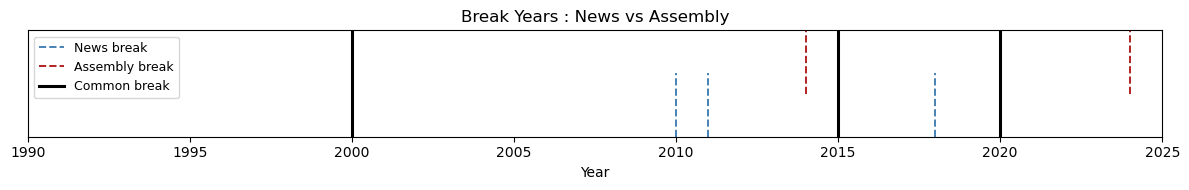

Timeline saved → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_years_timeline.png
▶ 3) 연도별 문서량 그래프 생성...


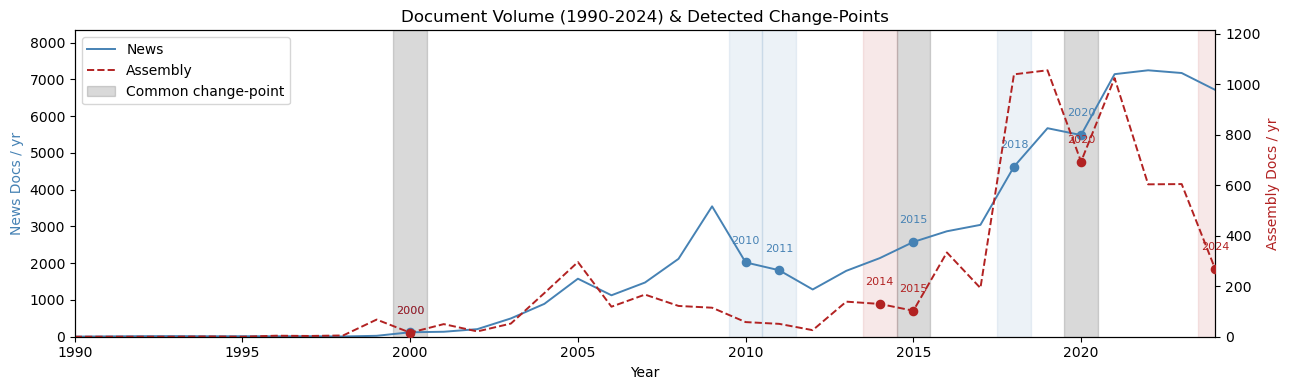

✅ 저장 완료: C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\FigA_volume_breaks.png

▶ 4) 민감도(Grid Search) 분석 시작...
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_news.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_assem.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_news.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_details_break_years_assem.xlsx
[detect_breaks] 신호 테이블 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\break_signals_table.xlsx
[detect_breaks] 연도별 수치 저장 → C:\Users\Administrator\Desktop\변곡점찾기\민감도 분

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Break Point Detection for Hydrogen-Economy Text Corpora (News & Assembly)
 + Grid Search 기반 민감도 분석
────────────────────────────────────────────────────────────────────────────
이 스크립트는
1) 기본 파라미터(PARAMS)로 한 번 변곡점을 추출(뉴스/국회 각각),
2) 공통 변곡점 계산 후 그래프를 그리고,
3) 곧바로 여러 파라미터 조합을 테스트하는 '민감도 분석(Grid Search)'까지 수행하여
   결과를 엑셀(sensitivity_results_grid.xlsx)로 저장합니다.
"""

from __future__ import annotations
import random
import json
import pickle
import warnings
from typing import Dict, List, Set
from pathlib import Path

import numpy as np
import pandas as pd
import ruptures as rpt
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from itertools import product
from collections import Counter

###############################################################################
# 0. PATH CONFIG & GLOBALS
###############################################################################
# ★★★ 필요한 경로를 맞춰주세요 ★★★
BASE_DIR = Path(r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석")

NEWS = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_news.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_news.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_news.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_news.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_news.xlsx",
    "break_years": BASE_DIR / "break_years_news.json",
}
ASSEMBLY = {
    "df_tokens":   BASE_DIR / "df_documents_tokens_assem.pkl",
    "kw_by_year":  BASE_DIR / "lda_keywords_by_year_assem.pkl",
    "w2v_models":  BASE_DIR / "word2vec_models_assem.pkl",
    "cos":         BASE_DIR / "Year_Topic_CosSim_assem.xlsx",
    "kl":          BASE_DIR / "Year_Topic_KLDiv_assem.xlsx",
    "break_years": BASE_DIR / "break_years_assem.json",
}
COMMON = {
    "break_common": BASE_DIR / "break_years_common.json"
}

# 시드 고정
_SEED = 42
random.seed(_SEED)
np.random.seed(_SEED)

###############################################################################
# 1. PARAMETER BLOCK (기본값) - 민감도 분석 시 Grid Search로 바뀔 수 있음
###############################################################################
PARAMS = {
    "pen": 1.2,          # PELT penalty
    "min_size": 3,       # PELT minimum segment length (years)
    "cos_q": 0.30,       # Cosine lower quantile per decade
    "kl_q": 0.70,        # KL upper quantile per decade
    "w2v_q": 0.55,       # Word2Vec similarity lower quantile
    "min_doc_news": 500, # min docs/year for News
    "min_doc_assem": 80, # min docs/year for Assembly
    "min_signals": 2,    # signals required to tag a break
    "delta_year": 1,     # window for common breaks (|y1 - y2| <= Δ)
}

###############################################################################
# 2. UTILITIES
###############################################################################
def _pad_year_index(counts: pd.Series) -> pd.Series:
    """Ensure continuous yearly index and fill missing years with zeros."""
    full = range(counts.index.min(), counts.index.max() + 1)
    return counts.reindex(full, fill_value=0)

def _decade_quantile(values: pd.Series, q: float) -> pd.Series:
    """
    Compute quantile per decade. e.g. 1990..1999 -> group by (year//10)*10
    """
    decade = (values.index // 10) * 10
    return values.groupby(decade).transform(lambda s: s.quantile(q))

###############################################################################
# 3. CORE DETECTION
###############################################################################
def detect_breaks(paths: Dict[str, Path], *, min_doc: int) -> Set[int]:
    """
    Multi-signal break-year detection for a single corpus (News or Assembly):
    1) Doc count (PELT)
    2) Topic shift (Cos, KL) vs. decade-based quantiles
    3) Word2Vec-based shift (quantile)
    Returns a set of break years.
    """
    pen, min_size = PARAMS["pen"], PARAMS["min_size"]
    cos_q, kl_q   = PARAMS["cos_q"], PARAMS["kl_q"]
    w2v_q         = PARAMS["w2v_q"]
    min_signals   = PARAMS["min_signals"]

    # (1) Doc count -> PELT
    df_tokens = pd.read_pickle(paths["df_tokens"])
    cnt = _pad_year_index(df_tokens.groupby("year").size().sort_index())

    cp_idx = rpt.Pelt(model="l2", min_size=min_size).fit(cnt.values).predict(pen)[:-1]
    sig_cnt = {cnt.index[i] for i in cp_idx}

    # (2) Topic similarity (Cos) & divergence (KL)
    cos_df = pd.read_excel(paths["cos"]).set_index("Year2")
    kl_df  = pd.read_excel(paths["kl"]).set_index("Year2")

    cos_thr = _decade_quantile(cos_df["Cosine_Sim"], cos_q)
    kl_thr  = _decade_quantile(kl_df["KL_Div"], kl_q)

    sig_topic = set(cos_df.index[cos_df["Cosine_Sim"] < cos_thr]) | \
                set(kl_df.index[kl_df["KL_Div"]       > kl_thr])

    # (3) Word2Vec semantic shift (quantile)
    year_kw: Dict[int, List[str]] = pickle.load(open(paths["kw_by_year"], "rb"))
    w2v = pickle.load(open(paths["w2v_models"], "rb"))

    sims = []
    later_years = []
    years = sorted(year_kw.keys())

    for y1, y2 in zip(years[:-1], years[1:]):
        # 연도별 문서량이 min_doc 미만이면 skip
        if cnt.get(y1, 0) < min_doc or cnt.get(y2, 0) < min_doc:
            continue

        common = set(year_kw[y1]) & set(year_kw[y2])
        vals = []
        for w in common:
            if (w in w2v[y1].wv) and (w in w2v[y2].wv):
                sim_val = 1 - cosine(w2v[y1].wv[w], w2v[y2].wv[w])
                vals.append(sim_val)
        if vals:
            sims.append(float(np.mean(vals)))
            later_years.append(y2)

    if sims:
        w2v_thr = float(np.quantile(sims, w2v_q))
    else:
        w2v_thr = 1.0  # sims가 비었을 때 fallback

    sig_w2v = {yy for yy, ss in zip(later_years, sims) if ss < w2v_thr}

    # (4) Fuse signals
    years_all = sorted(set(cnt.index) | sig_topic | sig_w2v)
    tbl = pd.DataFrame(index=years_all)
    tbl["cnt"]   = tbl.index.isin(sig_cnt).astype(int)
    tbl["topic"] = tbl.index.isin(sig_topic).astype(int)
    tbl["w2v"]   = tbl.index.isin(sig_w2v).astype(int)

    final = sorted(tbl[tbl.sum(axis=1) >= min_signals].index)

    # 결과 저장 (JSON)
    with open(paths["break_years"], "w", encoding="utf-8") as f:
        json.dump(final, f, ensure_ascii=False)

    # break_details_xxx.xlsx 저장
    df_result = pd.DataFrame(index=years_all)
    df_result.index.name = "Year"
    df_result["Doc_Count"]    = cnt.reindex(years_all, fill_value=0).values
    df_result["PELT_Signal"]  = tbl["cnt"].values
    df_result["Cosine_Sim"]   = cos_df["Cosine_Sim"].reindex(years_all)
    df_result["KL_Div"]       = kl_df["KL_Div"].reindex(years_all)
    df_result["Topic_Signal"] = tbl["topic"].values
    df_result["W2V_Signal"]   = tbl["w2v"].values
    df_result["Break_Label"]  = tbl.sum(axis=1) >= min_signals

    excel_path = paths["break_years"].with_name(
        "break_details_" + paths["break_years"].stem + ".xlsx"
    )
    df_result.to_excel(excel_path)
    print(f"[detect_breaks] 연도별 수치 저장 → {excel_path}")

    # 신호 테이블 저장
    tbl["final_break"] = tbl.index.isin(final).astype(int)
    out_excel_path = paths["break_years"].with_name("break_signals_table.xlsx")
    tbl.to_excel(out_excel_path)
    print(f"[detect_breaks] 신호 테이블 저장 → {out_excel_path}")

    return set(final)

###############################################################################
# 4. 시각화 함수 (뉴스/국회 변곡점 결과 플롯)
###############################################################################
def plot_timeline(news: Set[int], assemb: Set[int], common: List[int]) -> None:
    """간단 타임라인 그래프: News & Assembly 변곡점 수직선 표시, 공통변곡점은 굵게 표시."""
    plt.figure(figsize=(12, 2))
    plt.axhline(0, color="k", lw=.7)

    for y in news:
        plt.axvline(y, 0, .6, color="steelblue", ls="--", lw=1.4)
    for y in assemb:
        plt.axvline(y, .4, 1, color="firebrick", ls="--", lw=1.4)
    for y in common:
        plt.axvline(y, 0, 1, color="black", ls="-", lw=2.2)

    plt.xlim(1990, 2025)
    plt.yticks([])
    plt.xlabel("Year")
    plt.title("Break Years : News vs Assembly")
    plt.legend(handles=[
        mlines.Line2D([], [], color="steelblue", ls="--", lw=1.4, label="News break"),
        mlines.Line2D([], [], color="firebrick", ls="--", lw=1.4, label="Assembly break"),
        mlines.Line2D([], [], color="black", ls="-", lw=2.2, label="Common break"),
    ], loc="upper left", fontsize=9)
    plt.tight_layout()
    outfile = BASE_DIR / "break_years_timeline.png"
    plt.savefig(outfile, dpi=300)
    plt.show()
    print(f"Timeline saved → {outfile}")

def plot_volume_final(cnt_news: pd.Series, breaks_news: List[int],
                      cnt_assem: pd.Series, breaks_assem: List[int],
                      *,
                      yr_min=1990,
                      yr_max=2024,
                      anno_offset=12,
                      outfile="FigA_volume_breaks.png",
                      base_dir=None):
    """
    연도별 문서량(뉴스·국회)을 좌우축에 그려주고, 
    break 연도(세로 구간 음영 + 마커 + 주석) 표시.
    - 뉴스만 변곡점: 파란색 음영
    - 국회만 변곡점: 빨간색 음영
    - 둘 다 변곡점 : 보라색 음영
    """
    if base_dir is None:
        base_dir = BASE_DIR
    else:
        base_dir = Path(base_dir)

    years = np.arange(yr_min, yr_max + 1)

    b_n = [y for y in breaks_news  if yr_min <= y <= yr_max]
    b_a = [y for y in breaks_assem if yr_min <= y <= yr_max]

    set_n = set(b_n)
    set_a = set(b_a)
    common_breaks = set_n & set_a
    only_news     = set_n - common_breaks
    only_assem    = set_a - common_breaks

    y_news  = cnt_news.reindex(years, fill_value=0)
    y_assem = cnt_assem.reindex(years, fill_value=0)

    fig, axL = plt.subplots(figsize=(13, 4))
    axR = axL.twinx()
    axL.set_facecolor("white")

    def span(ax, yrs, color, alpha=0.10):
        for yy in yrs:
            ax.axvspan(yy - 0.5, yy + 0.5, color=color, alpha=alpha, zorder=0)

    # 음영
    span(axL, only_news,   'steelblue', alpha=0.10)
    span(axL, only_assem,  'firebrick', alpha=0.10)
    span(axL, common_breaks, 'black', alpha=0.15)

    # 선+마커
    ln1, = axL.plot(years, y_news, color='steelblue', lw=1.4, label='News')
    axL.scatter(b_n, y_news.loc[b_n], color='steelblue', s=35, zorder=3)

    ln2, = axR.plot(years, y_assem, color='firebrick', lw=1.4,
                    ls='--', label='Assembly')
    axR.scatter(b_a, y_assem.loc[b_a], color='firebrick', s=35, zorder=3)

    # 주석(연도)
    for y in b_n:
        axL.annotate(str(y), xy=(y, y_news.loc[y]),
                     xytext=(0, anno_offset),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color='steelblue', fontsize=8)

    for y in b_a:
        axR.annotate(str(y), xy=(y, y_assem.loc[y]),
                     xytext=(0, anno_offset),
                     textcoords='offset points',
                     ha='center', va='bottom',
                     color='firebrick', fontsize=8)

    axL.set_xlim(yr_min, yr_max)
    axL.xaxis.set_major_locator(MultipleLocator(5))
    axL.set_xlabel("Year")
    axL.set_ylabel("News Docs / yr",      color='steelblue')
    axR.set_ylabel("Assembly Docs / yr",  color='firebrick')

    axL.set_ylim(0, max(10, y_news.max() * 1.15))
    axR.set_ylim(0, max(10, y_assem.max() * 1.15))

    axL.set_title(f"Document Volume ({yr_min}-{yr_max}) & Detected Change-Points")

    patches = []
    if common_breaks:
        patches.append(
            mpatches.Patch(color='black', alpha=0.15, label='Common change-point')
        )

    axL.legend(handles=[ln1, ln2] + patches, loc='upper left')

    plt.tight_layout()
    outpath = base_dir / outfile
    plt.savefig(outpath, dpi=400)
    plt.show()
    print(f"✅ 저장 완료: {outpath}")

###############################################################################
# 5. 기본 실행(main) : 한 번 변곡점 추출 + 타임라인/문서량 그래프
###############################################################################
def main() -> None:
    print("▶ 1) 변곡점 탐지 시작 (기본 PARAMS)...")

    # 뉴스
    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    # 국회
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    # 공통 변곡점 (|y1 - y2| <= delta)
    delta = PARAMS["delta_year"]
    common = sorted({y for y in news_breaks 
                       for z in assem_breaks 
                       if abs(y - z) <= delta})

    with open(COMMON["break_common"], "w", encoding="utf-8") as f:
        json.dump(common, f, ensure_ascii=False)

    print("📰 News breaks   :", sorted(news_breaks))
    print("🏛 Assembly breaks:", sorted(assem_breaks))
    print("🔗 Common breaks  :", common)

    print("▶ 2) 타임라인 그래프 생성...")
    plot_timeline(news_breaks, assem_breaks, common)

    print("▶ 3) 연도별 문서량 그래프 생성...")
    df_n = pd.read_pickle(NEWS["df_tokens"])
    cnt_n = df_n.groupby("year").size()

    df_a = pd.read_pickle(ASSEMBLY["df_tokens"])
    cnt_a = df_a.groupby("year").size()

    plot_volume_final(cnt_news=cnt_n,
                      breaks_news=sorted(news_breaks),
                      cnt_assem=cnt_a,
                      breaks_assem=sorted(assem_breaks),
                      yr_min=1990,
                      yr_max=2024,
                      anno_offset=12,
                      outfile="FigA_volume_breaks.png",
                      base_dir=BASE_DIR)


###############################################################################
# 6. 민감도 분석( Grid Search ) 함수
###############################################################################
def run_detection_once(
    pen: float,
    cos_q: float,
    kl_q: float,
    w2v_q: float,
    min_signals: int,
    min_size: int,
):
    """
    주어진 파라미터로 뉴스·국회 변곡점을 탐지해서 
    (뉴스 변곡점, 국회 변곡점, 공통 변곡점) 반환.
    """
    # PARAMS 업데이트
    PARAMS["pen"] = pen
    PARAMS["cos_q"] = cos_q
    PARAMS["kl_q"] = kl_q
    PARAMS["w2v_q"] = w2v_q
    PARAMS["min_signals"] = min_signals
    PARAMS["min_size"] = min_size

    news_breaks  = detect_breaks(NEWS,     min_doc=PARAMS["min_doc_news"])
    assem_breaks = detect_breaks(ASSEMBLY, min_doc=PARAMS["min_doc_assem"])

    delta = PARAMS["delta_year"]
    common_breaks = sorted({y for y in news_breaks
                            for z in assem_breaks
                            if abs(y - z) <= delta})

    return sorted(news_breaks), sorted(assem_breaks), common_breaks

def sensitivity_analysis_grid():
    """
    Grid Search: 여러 파라미터 조합(pen, cos_q, kl_q, w2v_q, etc.)으로
    변곡점을 재탐지하여 DataFrame으로 저장.
    """
    print("\n▶ 4) 민감도(Grid Search) 분석 시작...")

    # (1) 파라미터 후보 정의
    pen_list         = [1.0, 1.5, 2.0]
    cos_q_list       = [0.25, 0.30]
    kl_q_list        = [0.70, 0.75]
    w2v_q_list       = [0.50, 0.55]
    min_signals_list = [2, 3]
    min_size_list    = [3]

    # (2) product로 모든 조합 만들기
    grid = product(pen_list, cos_q_list, kl_q_list, w2v_q_list, min_signals_list, min_size_list)

    all_rows = []

    # (3) 루프 돌면서 탐지
    for pen, cos_q, kl_q, w2v_q, min_signals, min_size in grid:
        nb, ab, cb = run_detection_once(pen, cos_q, kl_q, w2v_q, min_signals, min_size)
        row = {
            "pen": pen,
            "cos_q": cos_q,
            "kl_q": kl_q,
            "w2v_q": w2v_q,
            "min_signals": min_signals,
            "min_size": min_size,
            "news_breaks": nb,
            "assem_breaks": ab,
            "common_breaks": cb,
        }
        all_rows.append(row)

    # (4) DataFrame
    df_grid = pd.DataFrame(all_rows)
    out_xlsx = BASE_DIR / "sensitivity_results_grid.xlsx"
    df_grid.to_excel(out_xlsx, index=False)
    print(f"민감도 분석 결과 저장 -> {out_xlsx}")

    # (5) 예시: 등장 빈도 계산
    # - 여기서는 뉴스 변곡점을 예시로, 각 연도별 빈도를 출력해본다.
    news_counter = Counter()
    for row in df_grid.itertuples():
        for y in row.news_breaks:
            news_counter[y] += 1

    print("\n뉴스 변곡점별 등장 빈도(파라미터 조합별):")
    for y, c in sorted(news_counter.items()):
        print(f"  연도 {y} -> {c}회 / 총 {len(df_grid)}회 중")

    return df_grid

###############################################################################
# 7. MAIN ENTRY (실행부)
###############################################################################
if __name__ == "__main__":
    # 1) 기본 탐지: 한 번 돌리고 그래프 저장
    main()

    # 2) 민감도 분석(Grid Search) 실행
    df_sens = sensitivity_analysis_grid()
    print("\n[완료] 민감도 분석 DataFrame 상위 5행 미리보기:")
    print(df_sens.head(5))

def make_break_matrix(df_sens: pd.DataFrame, mode="news") -> pd.DataFrame:
    """
    df_sens : 민감도 분석 결과 (각 행=한 파라미터 조합)
    mode    : "news" / "assem" / "common" 중 하나
    반환 : "행=파라미터조합, 열=연도" 이고 값=1(변곡점 있음) or 0(없음)
    """
    # 1) 우선 민감도 결과에서 모든 변곡점 연도의 합집합을 구한다
    all_breaks = set()
    for row in df_sens.itertuples():
        if mode == "news":
            for y in row.news_breaks:
                all_breaks.add(y)
        elif mode == "assem":
            for y in row.assem_breaks:
                all_breaks.add(y)
        elif mode == "common":
            for y in row.common_breaks:
                all_breaks.add(y)
        else:
            raise ValueError("mode must be 'news'/'assem'/'common'")

    all_breaks_sorted = sorted(all_breaks)

    # 2) 각 행(파라미터 조합)에 대해, break 연도 목록 set으로 전환
    mat_data = []
    row_labels = []

    for i, row in enumerate(df_sens.itertuples()):
        if mode == "news":
            br_set = set(row.news_breaks)
        elif mode == "assem":
            br_set = set(row.assem_breaks)
        else:
            br_set = set(row.common_breaks)

        # break 연도에 해당하면 1, 아니면 0
        row_vals = [1 if y in br_set else 0 for y in all_breaks_sorted]
        mat_data.append(row_vals)

        # 파라미터를 문자열로 요약해서 row label로 쓸 수도 있음
        param_str = f"pen={row.pen}, cos_q={row.cos_q}, kl_q={row.kl_q}, w2v_q={row.w2v_q}, min_sig={row.min_signals}"
        row_labels.append(param_str)

    # 3) DataFrame 구성
    df_matrix = pd.DataFrame(mat_data, columns=all_breaks_sorted, index=row_labels)

    # 원하는 경우, 여기서 df_matrix에 파라미터별 컬럼을 추가로 붙일 수도 있음
    # 예: df_sens[['pen','cos_q','kl_q','w2v_q','min_signals','min_size']]

    return df_matrix


def example_usage(df_sens):
    # 예: 뉴스 변곡점에 대한 매트릭스
    df_news_mat = make_break_matrix(df_sens, mode="news")
    df_assem_mat = make_break_matrix(df_sens, mode="assem")
    df_common_mat = make_break_matrix(df_sens, mode="common")

    # 저장
    df_news_mat.to_excel("matrix_news_breaks.xlsx")
    df_assem_mat.to_excel("matrix_assem_breaks.xlsx")
    df_common_mat.to_excel("matrix_common_breaks.xlsx")

    # 결과 확인
    print("뉴스 변곡점 매트릭스 예시:")
    print(df_news_mat.head(10))



민감도 분석 데이터 프레임 (상위 5행):
   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]  


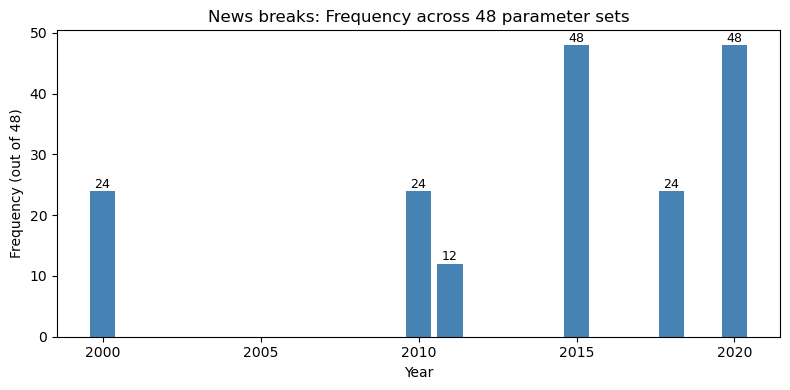

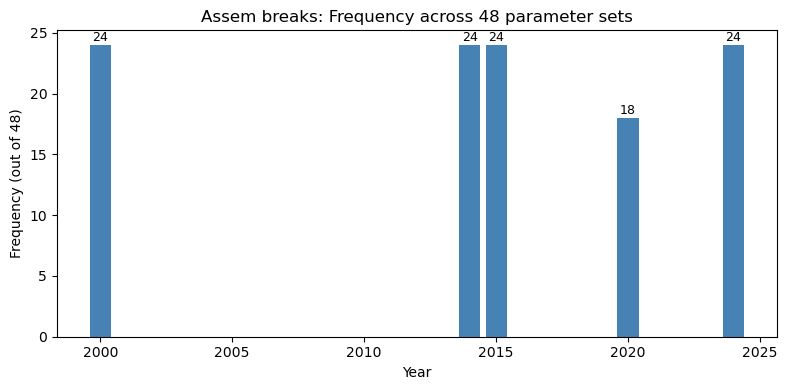

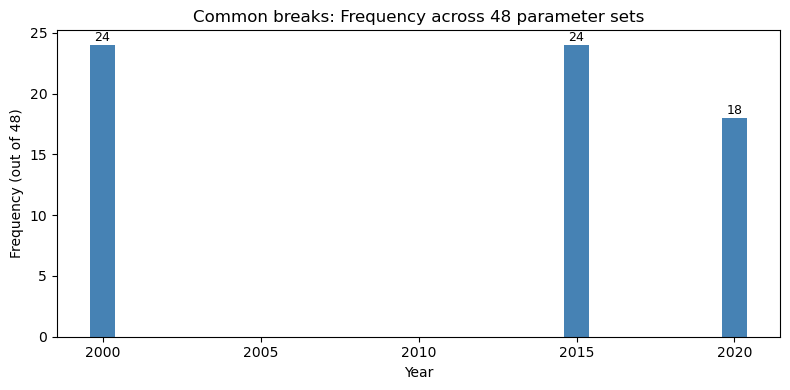

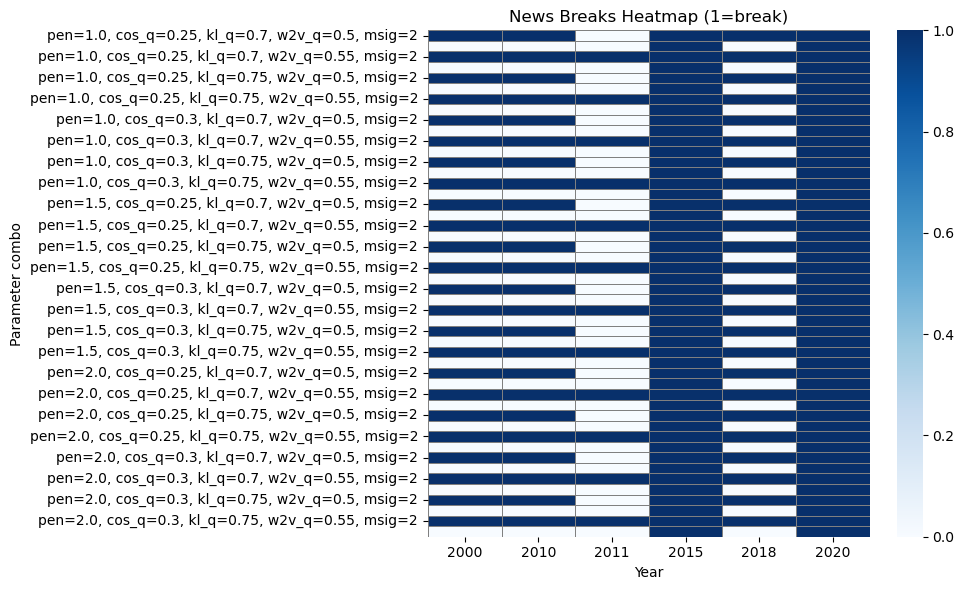

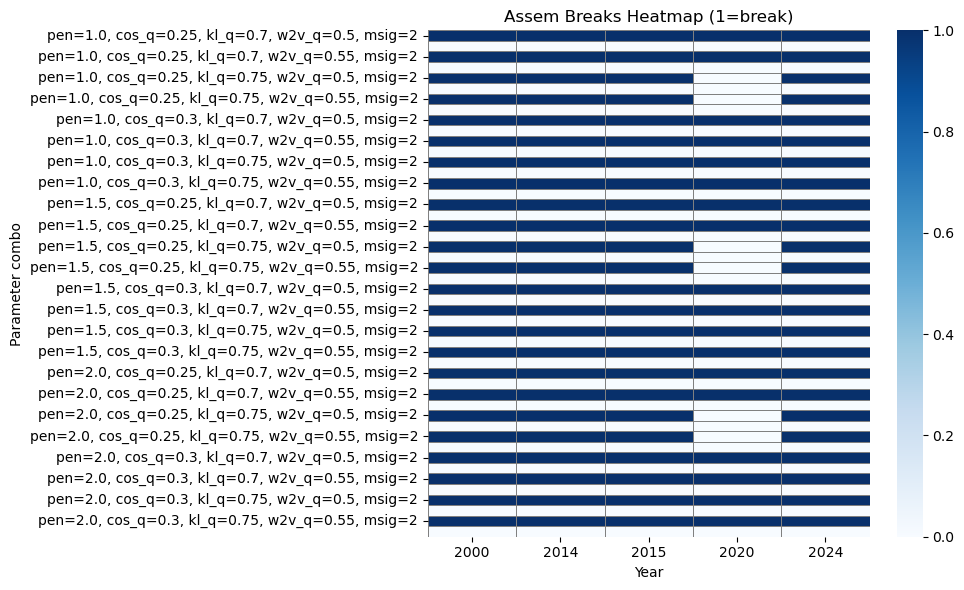

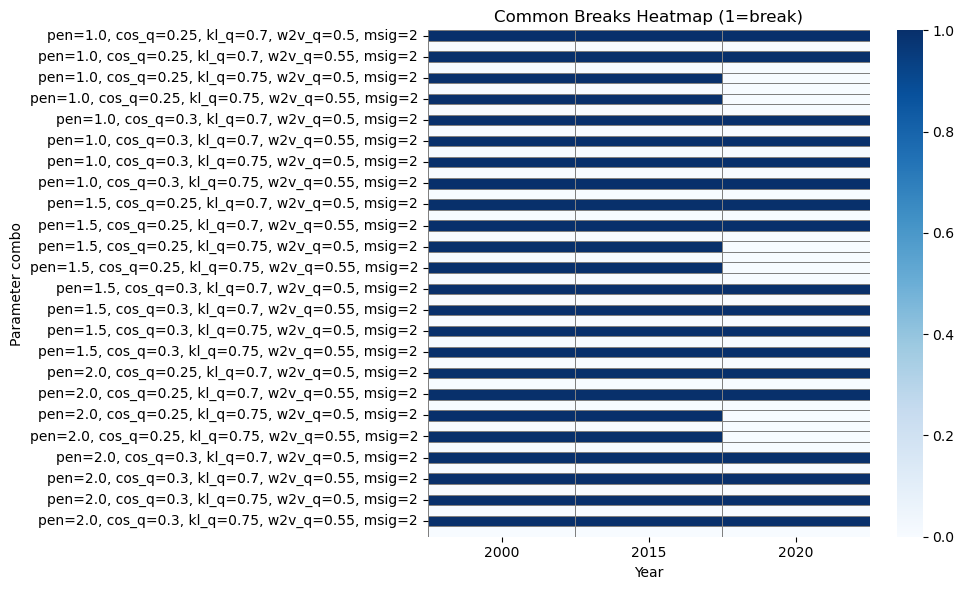

In [14]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

###############################################################################
# 1. 파일 불러오기 & 문자열 → 리스트 변환
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    filepath : r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    df_sens = pd.read_excel(filepath)
    
    # news_breaks, assem_breaks, common_breaks 열이 문자열 형태로 ["2000", ...] 이런 식이면
    # ast.literal_eval로 리스트 변환
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    
    return df_sens


###############################################################################
# 2. 연도별 등장 횟수(bar plot)
###############################################################################
def plot_break_frequency(df_sens, mode="news"):
    """
    df_sens: 각 행=한 파라미터 조합
    mode   : "news", "assem", "common" 중 하나
    """
    c = Counter()
    for row in df_sens.itertuples():
        if mode == "news":
            for y in row.news_breaks:
                c[y] += 1
        elif mode == "assem":
            for y in row.assem_breaks:
                c[y] += 1
        else:
            for y in row.common_breaks:
                c[y] += 1

    total_runs = len(df_sens)  
    years_sorted = sorted(c.keys())
    freq_counts = [c[y] for y in years_sorted]

    plt.figure(figsize=(8, 4))
    plt.bar(years_sorted, freq_counts, color='steelblue')
    plt.xlabel("Year")
    plt.ylabel(f"Frequency (out of {total_runs})")
    plt.title(f"{mode.capitalize()} breaks: Frequency across {total_runs} parameter sets")

    for x, val in zip(years_sorted, freq_counts):
        plt.text(x, val+0.05, str(val), ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


###############################################################################
# 3. 파라미터 조합 × 연도 매트릭스(heatmap)
###############################################################################
def make_break_matrix(df_sens: pd.DataFrame, mode="news") -> pd.DataFrame:
    """
    df_sens : 민감도 결과 (각 행=한 파라미터 조합, news_breaks/assem_breaks/common_breaks)
    mode    : "news", "assem", "common"
    return  : row=파라미터조합, col=연도, 값=1(포함) or 0(미포함)
    """
    all_breaks = set()
    for row in df_sens.itertuples():
        br_list = []
        if mode == "news":
            br_list = row.news_breaks
        elif mode == "assem":
            br_list = row.assem_breaks
        else:
            br_list = row.common_breaks
        all_breaks.update(br_list)

    all_breaks_sorted = sorted(all_breaks)

    matrix_data = []
    row_labels = []
    for row in df_sens.itertuples():
        if mode == "news":
            br_set = set(row.news_breaks)
        elif mode == "assem":
            br_set = set(row.assem_breaks)
        else:
            br_set = set(row.common_breaks)
        # 파라미터를 한 줄로 요약
        param_str = f"pen={row.pen}, cos_q={row.cos_q}, kl_q={row.kl_q}, w2v_q={row.w2v_q}, msig={row.min_signals}"
        row_labels.append(param_str)
        row_vals = [1 if y in br_set else 0 for y in all_breaks_sorted]
        matrix_data.append(row_vals)

    df_matrix = pd.DataFrame(matrix_data, columns=all_breaks_sorted, index=row_labels)
    return df_matrix


def plot_break_heatmap(df_sens: pd.DataFrame, mode="news"):
    df_matrix = make_break_matrix(df_sens, mode=mode)

    plt.figure(figsize=(10, 6))
    sns.heatmap(df_matrix, cmap="Blues", cbar=True, 
                linewidths=0.5, linecolor="gray")
    plt.xlabel("Year")
    plt.ylabel("Parameter combo")
    plt.title(f"{mode.capitalize()} Breaks Heatmap (1=break)")

    plt.tight_layout()
    plt.show()


###############################################################################
# 4. 실행 예시
###############################################################################
if __name__ == "__main__":
    # 1) 민감도 결과 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # 2) 불러오기
    df_sens = load_sensitivity_data(excel_path)
    print("민감도 분석 데이터 프레임 (상위 5행):")
    print(df_sens.head())

    # 3) 예시 시각화 (뉴스 기준)
    plot_break_frequency(df_sens, mode="news")
    plot_break_frequency(df_sens, mode="assem")
    plot_break_frequency(df_sens, mode="common")

    # heatmap
    plot_break_heatmap(df_sens, mode="news")
    plot_break_heatmap(df_sens, mode="assem")
    plot_break_heatmap(df_sens, mode="common")


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\ProgramData\anaconda3\envs\pypsa-earth\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"]

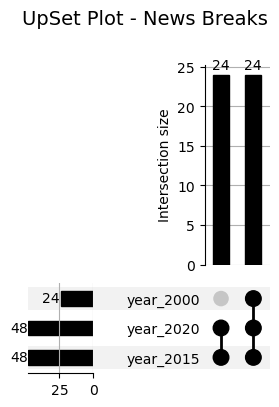

In [23]:
!pip install upsetplot

import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import from_memberships, UpSet

###############################################################################
# 1) 엑셀 파일 로드 (문자열 -> 리스트 변환)
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    df_sens = pd.read_excel(filepath)
    # news_breaks, assem_breaks, common_breaks가 문자열이면 리스트로 변환
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    return df_sens

###############################################################################
# 2) Upset Plot 함수 (행→카테고리 집합 으로 변환)
###############################################################################
def plot_upset_for_breaks(df_sens: pd.DataFrame, mode="news", years_of_interest=None):
    """
    df_sens : 민감도 결과 (news_breaks / assem_breaks / common_breaks)
    mode    : "news", "assem", "common"
    years_of_interest : 특정 연도만 표시(예: [2000, 2015]); None이면 해당 모드 전체 연도.
    """

    # 1) 전체 변곡점 연도 수집
    all_breaks = set()
    for row in df_sens.itertuples():
        br_list = getattr(row, f"{mode}_breaks")
        all_breaks.update(br_list)

    # years_of_interest가 지정되지 않으면, 등장 연도 전체 사용
    if years_of_interest is None:
        years_of_interest = sorted(all_breaks)
    else:
        # 입력한 연도 중 실제 데이터에 있는 연도만 남김
        years_of_interest = sorted(set(years_of_interest) & all_breaks)

    # 2) "카테고리 → 해당 row 인덱스들" 구조 만들기
    #    예: membership_dict["year_2015"] = {0,1,5}  (파라미터 행 0,1,5번에서 2015 발견)
    membership_dict = {}
    for y in years_of_interest:
        row_set = set()
        for i, row in enumerate(df_sens.itertuples()):
            br_list = getattr(row, f"{mode}_breaks")
            if y in br_list:
                row_set.add(i)
        membership_dict[f"year_{y}"] = row_set

    # 3) upsetplot은 "행 i가 속한 카테고리들의 집합"을 한 행씩 나열하길 원함
    #    즉, row i -> {year_2015, year_2020} 형태
    #    => membership_dict를 뒤집어서 memberships_per_row[i] = {카테고리1, 카테고리2, ...}
    cat_names = sorted(membership_dict.keys())  # 예: ["year_2000","year_2015","year_2020",...]
    memberships_per_row = []

    n_rows = len(df_sens)
    for i in range(n_rows):
        row_categories = set()
        for cat in cat_names:
            if i in membership_dict[cat]:
                row_categories.add(cat)
        memberships_per_row.append(row_categories)

    # 4) upsetplot.from_memberships() 호출
    upset_data = from_memberships(
        memberships=memberships_per_row, 
        data=range(n_rows)  # 데이터 포인트 레이블(행 인덱스)
    )

    # 5) 실제 플롯
    UpSet(upset_data, subset_size='count', show_counts=True).plot()
    plt.suptitle(f"UpSet Plot - {mode.capitalize()} Breaks", y=1.02, fontsize=14)
    plt.show()


###############################################################################
# 3) 테스트 실행
###############################################################################
if __name__ == "__main__":
    # 1) 엑셀 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # 2) 민감도 데이터 로드
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # 3) Upset Plot 예시: 뉴스 담론, [2000, 2015, 2020]만 확인
    plot_upset_for_breaks(df_sens, mode="news", years_of_interest=[2000, 2015, 2020])


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



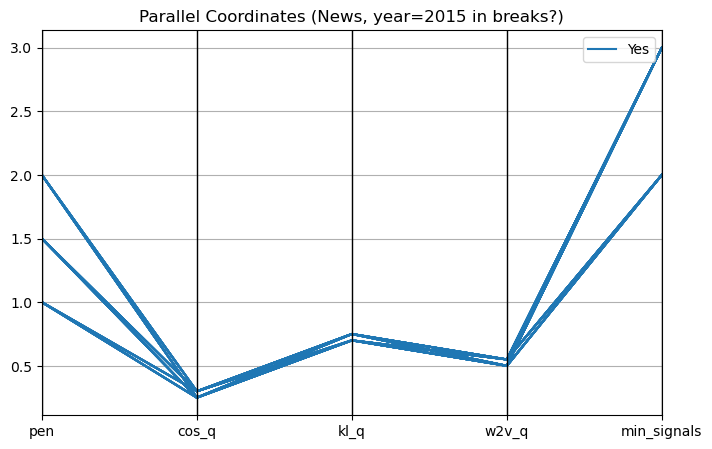

In [29]:
import ast
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

###############################################################################
# 1) 엑셀 파일 로드 (민감도 결과 불러오기)
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    """
    엑셀 파일 경로를 받아 df_sens로 로드:
    - pen, cos_q, kl_q, w2v_q, min_signals, news_breaks, assem_breaks, common_breaks
    - news_breaks 등은 ast.literal_eval로 문자열->리스트 변환
    """
    df_sens = pd.read_excel(filepath)
    # 만약 break 컬럼들이 문자열 형태라면 리스트로 변환
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    return df_sens


###############################################################################
# 2) 평행좌표 (Parallel Coordinates)용 데이터 전처리
###############################################################################
def prepare_parallel_data(df_sens, mode="news", year=2015):
    """
    df_sens를 parallel_coordinates에 적합한 형태로 변환:
    - pen, cos_q, kl_q, w2v_q, min_signals -> 수치 컬럼
    - 'has_year' 컬럼(해당 year를 포함하면 'Yes', 아니면 'No') -> 색깔 구분용
    """
    rows = []
    for r in df_sens.itertuples():
        breaks = getattr(r, f"{mode}_breaks")  # news_breaks, assem_breaks, ...
        row_dict = {
            'pen': r.pen,
            'cos_q': r.cos_q,
            'kl_q': r.kl_q,
            'w2v_q': r.w2v_q,
            'min_signals': r.min_signals,
            'has_year': "Yes" if year in breaks else "No"
        }
        rows.append(row_dict)
    return pd.DataFrame(rows)

def plot_parallel_coords(df_sens, mode="news", year=2015):
    """
    특정 연도(예: 2015)를 포함하는 조합이면 'Yes', 아니면 'No'로 구분하여
    평행좌표(Parallel Coordinates) 시각화
    """
    df_plot = prepare_parallel_data(df_sens, mode=mode, year=year)
    plt.figure(figsize=(8, 5))
    parallel_coordinates(df_plot, class_column='has_year',
                         color=['#1f77b4','#ff7f0e'])
    plt.title(f"Parallel Coordinates ({mode.capitalize()}, year={year} in breaks?)")
    plt.grid(True)
    plt.show()


###############################################################################
# 3) 실행 예시
###############################################################################
if __name__ == "__main__":
    # ① 엑셀 파일 경로 설정
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # ② 민감도 결과 불러오기
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # ③ 뉴스 담론(mode="news")에서 year=2015를 포함하는지 여부로 평행좌표 시각화
    plot_parallel_coords(df_sens, mode="news", year=2015)


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



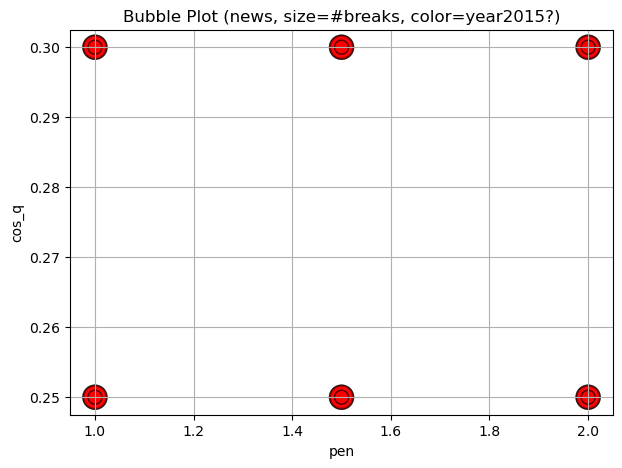

In [30]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 1) 엑셀 파일 로드 (민감도 결과)
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    """
    - filepath: 'C:\\Users\\Administrator\\Desktop\\변곡점찾기\\민감도 분석\\sensitivity_results_grid.xlsx' 등
    - 불러온 후 news_breaks / assem_breaks / common_breaks가 문자열이면 리스트로 변환
    """
    df_sens = pd.read_excel(filepath)
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    return df_sens

###############################################################################
# 2) 버블 스캐터 함수
###############################################################################
def plot_scatter_bubble(df_sens, mode="news", xparam="pen", yparam="cos_q", highlight_year=2015):
    """
    x축=xparam, y축=yparam
    점의 크기=해당 조합의 변곡점 개수 (mode 기준)
    색상=highlight_year(연도) 포함 여부 (포함이면 red, 아니면 gray)
    """
    xs = []
    ys = []
    sizes = []
    colors = []
    
    for r in df_sens.itertuples():
        x_val = getattr(r, xparam)
        y_val = getattr(r, yparam)
        br_list = getattr(r, f"{mode}_breaks")
        
        # 크기: 변곡점 개수 * 50
        size_val = len(br_list) * 50
        # 색상: highlight_year 포함 시 빨강, 아니면 회색
        c_val = 'red' if highlight_year in br_list else 'gray'

        xs.append(x_val)
        ys.append(y_val)
        sizes.append(size_val)
        colors.append(c_val)

    plt.figure(figsize=(7,5))
    plt.scatter(xs, ys, s=sizes, c=colors, alpha=0.6, edgecolors='black')
    plt.xlabel(xparam)
    plt.ylabel(yparam)
    plt.title(f"Bubble Plot ({mode}, size=#breaks, color=year{highlight_year}?)")
    plt.grid(True)
    plt.show()

###############################################################################
# 3) 실행 예시
###############################################################################
if __name__ == "__main__":
    # (1) 엑셀 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # (2) 민감도 결과 불러오기
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # (3) 버블 스캐터: x=pen, y=cos_q, highlight_year=2015
    plot_scatter_bubble(df_sens, mode="news", xparam="pen", yparam="cos_q", highlight_year=2015)


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



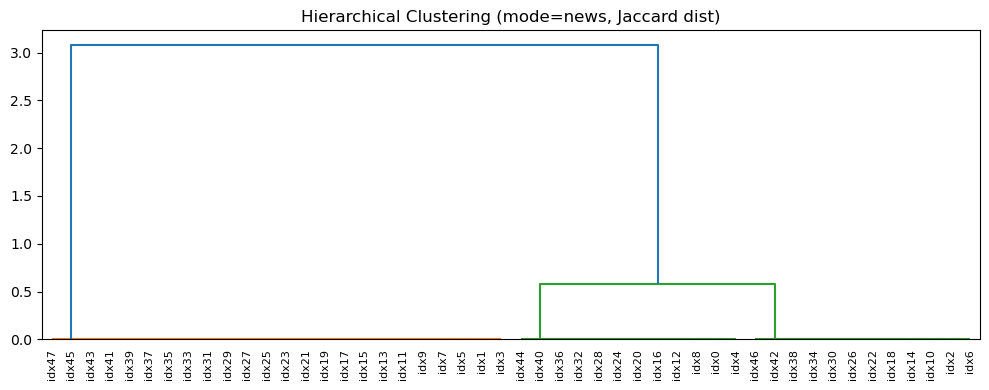

In [33]:
import ast
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

###############################################################################
# 1) 엑셀 파일 로드 (민감도 결과)
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:

    filepath: r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    df_sens = pd.read_excel(filepath)
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    return df_sens

###############################################################################
# 2) Jaccard distance 계산 함수
###############################################################################
def jaccard_distance(set1, set2):
    inter = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - (inter / union) if union != 0 else 0.0

###############################################################################
# 3) 클러스터링 & 덴드로그램
###############################################################################
def cluster_dendrogram(df_sens, mode="news"):
    """
    1) 각 행(파라미터 조합)의 변곡점 리스트를 set으로 변환
    2) Jaccard distance 행렬 계산
    3) 계층적 군집 -> 덴드로그램 시각화
    """
    # (1) set 리스트 생성
    break_sets = []
    labels = []
    for i, row in enumerate(df_sens.itertuples()):
        br_set = set(getattr(row, f"{mode}_breaks"))
        break_sets.append(br_set)
        labels.append(f"idx{i}")  # 또는 다른 식별자

    n = len(break_sets)

    # (2) 거리행렬(n x n) 구성
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            dist_val = jaccard_distance(break_sets[i], break_sets[j])
            dist_matrix[i,j] = dist_val
            dist_matrix[j,i] = dist_val

    # 상삼각형 -> 1D
    condensed = squareform(dist_matrix)

    # (3) linkage & dendrogram
    Z = linkage(condensed, method='ward') # or 'average', 'complete', etc.

    plt.figure(figsize=(10, 4))
    dendrogram(Z, labels=labels, leaf_rotation=90)
    plt.title(f"Hierarchical Clustering (mode={mode}, Jaccard dist)")
    plt.tight_layout()
    plt.show()

###############################################################################
# 4) 실행 예시
###############################################################################
if __name__ == "__main__":
    # (a) 엑셀 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # (b) 민감도 결과 로드
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # (c) 뉴스 모드에서 덴드로그램
    cluster_dendrogram(df_sens, mode="news")


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



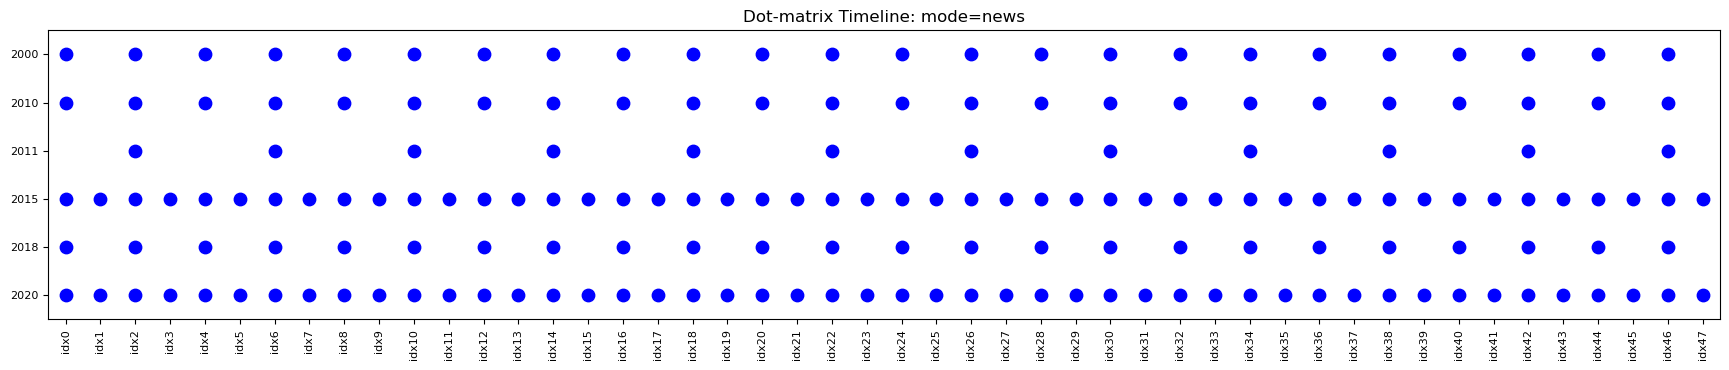

In [34]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###############################################################################
# 1) 엑셀 파일 로드 (민감도 결과)
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    filepath: r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"
    
    df_sens = pd.read_excel(filepath)
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df_sens.columns:
            df_sens[col] = df_sens[col].apply(ast.literal_eval)
    return df_sens

###############################################################################
# 2) Dot-Matrix Timeline 함수
###############################################################################
def dot_matrix_timeline(df_sens, mode="news"):
    """
    행=연도(오름차순), 열=파라미터조합(index), 
    변곡점이면 ●, 아니면 빈칸 등으로 표시
    """
    # 1) 전체 연도 수집
    all_years = set()
    for row in df_sens.itertuples():
        br_list = getattr(row, f"{mode}_breaks")
        all_years.update(br_list)
    sorted_years = sorted(all_years)

    # 2) 파라미터 조합(열) 레이블
    combo_labels = []
    combos = []
    for i, row in enumerate(df_sens.itertuples()):
        label = f"idx{i}"  # 혹은 파라미터 문자열 등
        combos.append(row)
        combo_labels.append(label)

    # 3) (row=연도, col=조합) 매트릭스 0/1
    mat = []
    for y in sorted_years:
        row_vals = []
        for c in combos:
            br_list = getattr(c, f"{mode}_breaks")
            row_vals.append(1 if y in br_list else 0)
        mat.append(row_vals)

    mat = np.array(mat)  # shape=(len(sorted_years), len(df_sens))

    # 4) 시각화
    fig, ax = plt.subplots(figsize=(len(df_sens)*0.3 + 3, len(sorted_years)*0.3 + 2))
    ax.set_xlim(-0.5, len(df_sens)-0.5)
    ax.set_ylim(-0.5, len(sorted_years)-0.5)

    ax.set_xticks(range(len(df_sens)))
    ax.set_xticklabels(combo_labels, rotation=90, fontsize=8)

    ax.set_yticks(range(len(sorted_years)))
    ax.set_yticklabels(sorted_years, fontsize=8)

    # 점 찍기
    for i, y in enumerate(sorted_years):
        for j, combo_val in enumerate(combo_labels):
            if mat[i, j] == 1:
                ax.scatter(j, i, s=80, c='blue', marker='o')

    ax.invert_yaxis()  # 연도가 위에서 아래로 진행
    ax.set_title(f"Dot-matrix Timeline: mode={mode}")
    plt.tight_layout()
    plt.show()

###############################################################################
# 3) 실행 예시
###############################################################################
if __name__ == "__main__":
    # (1) 엑셀 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # (2) 로드
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # (3) 점 매트릭스 시각화: 뉴스 담론 (mode="news")
    dot_matrix_timeline(df_sens, mode="news")


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



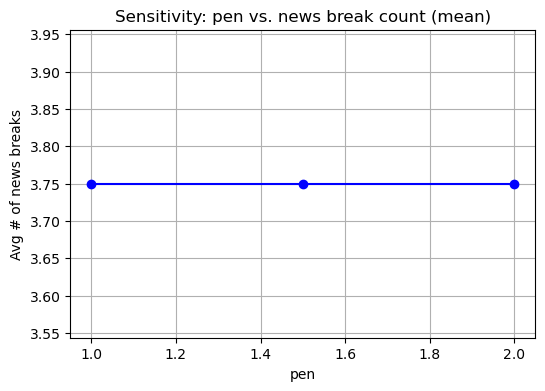

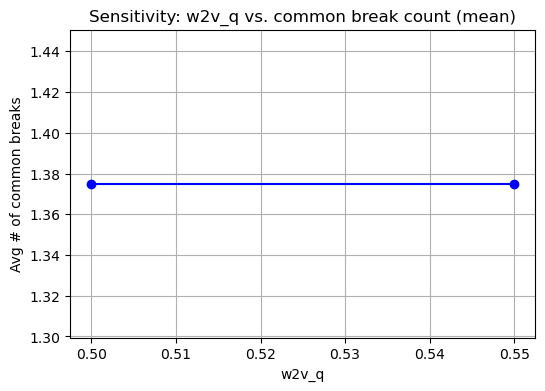

In [35]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

###############################################################################
# 1) 엑셀 파일 로드
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:

    filepath:r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    df = pd.read_excel(filepath)
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        df[col] = df[col].apply(ast.literal_eval)
    return df

###############################################################################
# 2) 파라미터별 '변곡점 개수' 평균을 선 그래프로 시각화
###############################################################################
def plot_sensitivity_by_param(df_sens: pd.DataFrame,
                              param: str = "pen",
                              mode: str = "news"):
    """
    df_sens : 민감도 분석 결과 (각 행=파라미터 조합)
    param   : 'pen' / 'cos_q' / 'kl_q' / 'w2v_q' / 'min_signals' 등 중 택1
    mode    : 'news' / 'assem' / 'common' 등

    목적:
    - param 값 vs. 해당 모드의 변곡점 개수(평균) 그래프를 그린다.
    """
    # 1) param 값으로 그룹화 → 각 그룹의 변곡점 개수 목록
    grouped = df_sens.groupby(param)[f"{mode}_breaks"].apply(list)

    x_vals = []
    y_means = []

    # 2) 각 param 값에 대한 변곡점 개수의 평균 계산
    for p_val, list_of_lists in grouped.items():
        total_count = 0
        total_combo = 0
        for breaks_list in list_of_lists:  # 각 조합의 변곡점 리스트
            total_count += len(breaks_list)
            total_combo += 1
        avg_breaks = total_count / total_combo if total_combo > 0 else 0
        x_vals.append(p_val)
        y_means.append(avg_breaks)

    # 3) param이 수치형이면 정렬
    combined = sorted(zip(x_vals, y_means), key=lambda x: x[0])
    x_vals, y_means = zip(*combined)

    # 4) 그래프
    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_means, marker='o', color='blue')
    plt.xlabel(param)
    plt.ylabel(f"Avg # of {mode} breaks")
    plt.title(f"Sensitivity: {param} vs. {mode} break count (mean)")
    plt.grid(True)
    plt.show()


###############################################################################
# 3) 실행 예시
###############################################################################
if __name__ == "__main__":
    # (a) 엑셀 파일 경로
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # (b) 데이터 로드
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # (c) 예시 그래프 1: pen 값별 뉴스 변곡점 개수 평균
    plot_sensitivity_by_param(df_sens, param="pen", mode="news")

    # (d) 예시 그래프 2: w2v_q 값별 공통 변곡점 개수 평균
    plot_sensitivity_by_param(df_sens, param="w2v_q", mode="common")


   pen  cos_q  kl_q  w2v_q  min_signals  min_size  \
0  1.0   0.25  0.70   0.50            2         3   
1  1.0   0.25  0.70   0.50            3         3   
2  1.0   0.25  0.70   0.55            2         3   
3  1.0   0.25  0.70   0.55            3         3   
4  1.0   0.25  0.75   0.50            2         3   

                            news_breaks                    assem_breaks  \
0        [2000, 2010, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
1                          [2015, 2020]                              []   
2  [2000, 2010, 2011, 2015, 2018, 2020]  [2000, 2014, 2015, 2020, 2024]   
3                          [2015, 2020]                              []   
4        [2000, 2010, 2015, 2018, 2020]        [2000, 2014, 2015, 2024]   

        common_breaks  
0  [2000, 2015, 2020]  
1                  []  
2  [2000, 2015, 2020]  
3                  []  
4        [2000, 2015]   



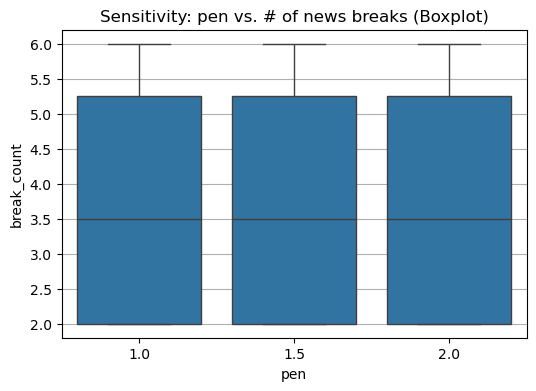

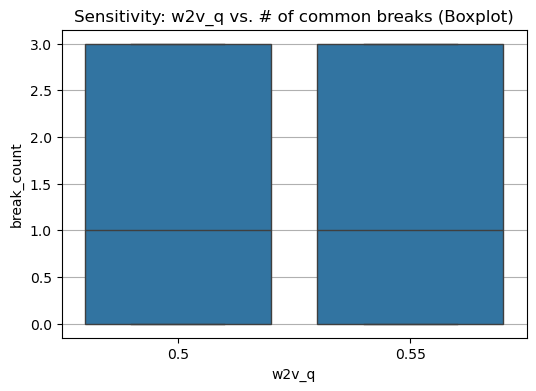

In [36]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###############################################################################
# 1) 엑셀 파일 로드
###############################################################################
def load_sensitivity_data(filepath: str) -> pd.DataFrame:
    filepath:r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    df = pd.read_excel(filepath)
    for col in ["news_breaks", "assem_breaks", "common_breaks"]:
        if col in df.columns:
            df[col] = df[col].apply(ast.literal_eval)
    return df

###############################################################################
# 2) Boxplot 함수
###############################################################################
def plot_sensitivity_boxplot(df_sens: pd.DataFrame,
                             param: str = "pen",
                             mode: str = "news"):
    """
    특정 파라미터 값에 따른 (뉴스/국회/공통) 변곡점 개수의 분포를 박스플롯으로 시각화.

    param : 예) 'pen', 'cos_q', 'kl_q', 'w2v_q', 'min_signals' 등
    mode  : 'news', 'assem', 'common'
    """
    # (1) [param, break_count] 구조의 임시 DataFrame
    rows = []
    for r in df_sens.itertuples():
        p_val = getattr(r, param)
        breaks_list = getattr(r, f"{mode}_breaks")
        count = len(breaks_list)
        rows.append({param: p_val, 'break_count': count})
    df_plot = pd.DataFrame(rows)

    # (2) Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_plot, x=param, y='break_count')
    plt.title(f"Sensitivity: {param} vs. # of {mode} breaks (Boxplot)")
    plt.grid(True, axis='y')
    plt.show()

###############################################################################
# 3) 실행 예시
###############################################################################
if __name__ == "__main__":
    # (a) 엑셀 파일 경로 설정
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx"

    # (b) 데이터 로드
    df_sens = load_sensitivity_data(excel_path)
    print(df_sens.head(), "\n")

    # (c) Boxplot 예시: pen 값에 따른 뉴스 변곡점 분포
    plot_sensitivity_boxplot(df_sens, param="pen", mode="news")

    # (d) Boxplot 예시: w2v_q 값에 따른 공통 변곡점 분포
    plot_sensitivity_boxplot(df_sens, param="w2v_q", mode="common")


✅ 그래프가 저장되었습니다: figure_B2_break_freq.png


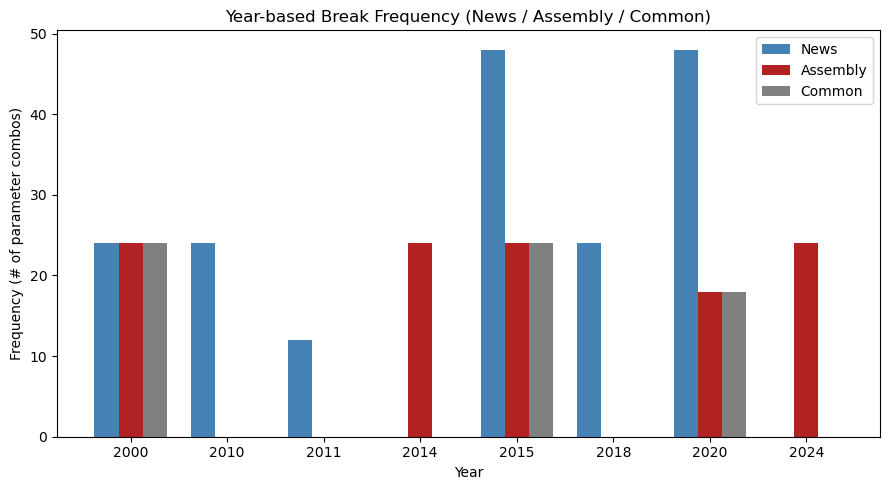

In [37]:
import pandas as pd
import ast   # 문자열("[2000, 2015, 2020]" 등)를 파이썬 list로 변환
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def plot_break_frequency(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="figure_B2_break_freq.png"
):
    """
    1) 민감도 분석 결과 파일(Excel)에서
       - 'news_breaks', 'assem_breaks', 'common_breaks' 열에 담긴 리스트 문자열 파싱
    2) 뉴스/국회/공통 변곡점별 연도 등장 횟수 Counter 계산
    3) 연도별 빈도를 막대그래프로 시각화 (News / Assembly / Common)
    """
    # 1. 엑셀 읽기
    df = pd.read_excel(excel_path)

    # 2. 빈도 계산용 Counter
    news_counter   = Counter()
    assem_counter  = Counter()
    common_counter = Counter()

    for row in df.itertuples():
        # news_breaks, assem_breaks, common_breaks 컬럼이 문자열 형태의 리스트이므로 literal_eval로 변환
        nb_list = ast.literal_eval(row.news_breaks) if isinstance(row.news_breaks, str) else []
        ab_list = ast.literal_eval(row.assem_breaks) if isinstance(row.assem_breaks, str) else []
        cb_list = ast.literal_eval(row.common_breaks) if isinstance(row.common_breaks, str) else []

        for y in nb_list:
            news_counter[y] += 1
        for y in ab_list:
            assem_counter[y] += 1
        for y in cb_list:
            common_counter[y] += 1

    # 3. 전체 연도 합치기
    all_years = sorted(
        set(news_counter.keys())
        | set(assem_counter.keys())
        | set(common_counter.keys())
    )

    # 4. 각 연도별 count 추출
    news_counts   = [news_counter[y]   for y in all_years]
    assem_counts  = [assem_counter[y]  for y in all_years]
    common_counts = [common_counter[y] for y in all_years]

    # 5. 막대그래프 그리기
    x = np.arange(len(all_years))
    width = 0.25

    fig, ax = plt.subplots(figsize=(9, 5))

    # News, Assembly, Common 세 그룹을 나란히
    ax.bar(x - width, news_counts,   width, color='steelblue', label='News')
    ax.bar(x,         assem_counts,  width, color='firebrick', label='Assembly')
    ax.bar(x + width, common_counts, width, color='gray',      label='Common')

    ax.set_xticks(x)
    ax.set_xticklabels(all_years, rotation=0)
    ax.set_xlabel("Year")
    ax.set_ylabel("Frequency (# of parameter combos)")
    ax.set_title("Year-based Break Frequency (News / Assembly / Common)")
    ax.legend()

    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    print(f"✅ 그래프가 저장되었습니다: {output_fig}")
    plt.show()


if __name__ == "__main__":
    plot_break_frequency()


[DEBUG] mat_array.shape: (48, 6)
[DEBUG] unique values in mat_array: [0 1]
[DEBUG] sum of mat_array (total 1 count): 180
✅ Heatmap saved: heatmap_news_breaks.png


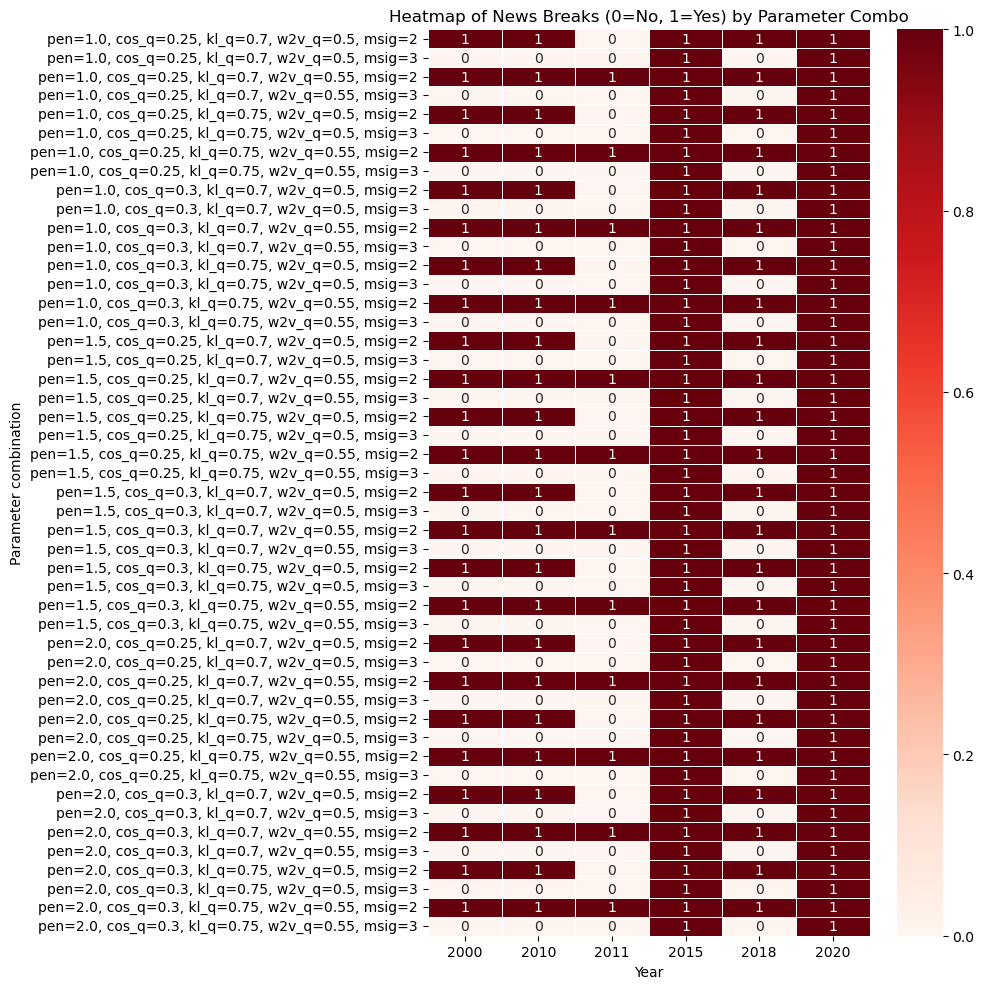

In [56]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_breaks_news(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="heatmap_news_breaks.png"
):
    # 1) 엑셀에서 데이터 읽기
    df = pd.read_excel(excel_path)

    # 2) 파라미터 조합 식별자(문자열) 만들기
    combo_labels = []
    for row in df.itertuples():
        label = (
            f"pen={row.pen}, cos_q={row.cos_q}, kl_q={row.kl_q},"
            f" w2v_q={row.w2v_q}, msig={row.min_signals}"
        )
        combo_labels.append(label)
    df["param_label"] = combo_labels

    # 3) 전체 ‘뉴스 변곡점’에 등장하는 모든 연도 수집
    all_years = set()
    for row in df.itertuples():
        nb_list = []
        if isinstance(row.news_breaks, str):
            nb_list = ast.literal_eval(row.news_breaks)
        for y in nb_list:
            all_years.add(y)

    # 만약 all_years가 비어있으면 → 모든 조합에서 뉴스 변곡점이 없는 상황
    if not all_years:
        print("※ 뉴스 변곡점이 전혀 검출되지 않았습니다. (all_years = empty)")
        return

    all_years_sorted = sorted(all_years)

    # 4) 파라미터 조합 × 연도 매트릭스 (0/1)
    matrix = []
    for row in df.itertuples():
        nb_list = []
        if isinstance(row.news_breaks, str):
            nb_list = ast.literal_eval(row.news_breaks)
        nb_set = set(nb_list)  # 변환
        row_vector = [1 if y in nb_set else 0 for y in all_years_sorted]
        matrix.append(row_vector)

    mat_array = np.array(matrix)

    # ───────── 디버깅용 출력 ─────────
    print("[DEBUG] mat_array.shape:", mat_array.shape)
    print("[DEBUG] unique values in mat_array:", np.unique(mat_array))
    print("[DEBUG] sum of mat_array (total 1 count):", mat_array.sum())
    # ──────────────────────────────────

    # 5) 히트맵
    plt.figure(figsize=(10, 10))

    # cmap="Reds" 일 때 0과 1의 차이가 흐릿할 수 있으니, 더 뚜렷한 cmap을 써보거나,
    # 혹은 annot=True 로 셀 내부에 숫자를 찍어보면 눈에 잘 띕니다.
    sns.heatmap(
        mat_array,
        cmap="Reds",       
        cbar=True,
        xticklabels=all_years_sorted,
        yticklabels=df["param_label"],
        annot=True,        # True → 0/1 숫자 표시
        fmt="d",           # 정수 포맷
        vmin=0, vmax=1,    # 0~1 범위로 고정
        linewidths=0.5,    # 셀 경계선
        linecolor="white"  
    )
    plt.xlabel("Year")
    plt.ylabel("Parameter combination")
    plt.title("Heatmap of News Breaks (0=No, 1=Yes) by Parameter Combo")
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    print(f"✅ Heatmap saved: {output_fig}")
    plt.show()
plot_heatmap_breaks_news()

In [ ]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

def plot_heatmap_binary_discrete(
    excel_path,
    output_fig="heatmap_discrete.png"
):
    # 1) 엑셀 데이터를 불러와서, 0 1 행렬 생성 (이 부분은 생략 가능·기존 코드 재활용)
    df = pd.read_excel(excel_path)
    # 예시로 param_label, years, matrix 등을 만들어 두었다 가정

    # 가령 mat_array가 (행, 열) 형태로 0/1만 들어있다고 하자
    # 아래는 간단히 예시
    mat_array = np.array([
        [0,1,0,1],
        [1,1,1,0],
        [0,0,0,0],
        [1,0,1,1]
    ])
    row_labels = ["Combo A","Combo B","Combo C","Combo D"]
    col_labels = [1990, 2000, 2015, 2020]

    # 2) ListedColormap 객체 준비. 두 칸: 0→흰색, 1→빨강
    #   필요한 경우 더 구분하기 쉬운 다른 색(파랑,회색 등)을 배정 가능
    cmap_discrete = ListedColormap(["white", "red"])

    # 3) 히트맵 그리기
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        mat_array,
        cmap=cmap_discrete,
        # discrete이므로 vmin=0, vmax=1, center=등 설정해주면 좋음
        vmin=0, vmax=1,
        annot=True, fmt="d", 
        xticklabels=col_labels,
        yticklabels=row_labels,
        cbar=False  # 이산형 2색인 경우, cbar 빼는 게 깔끔함
    )
    plt.title("Discrete 0-1 Heatmap")
    plt.xlabel("Year")
    plt.ylabel("Parameter Combo")
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    plt.show()
    print(f"Saved discrete 0-1 heatmap -> {output_fig}")


✅ Saved bar chart -> figure_B2_bar.png


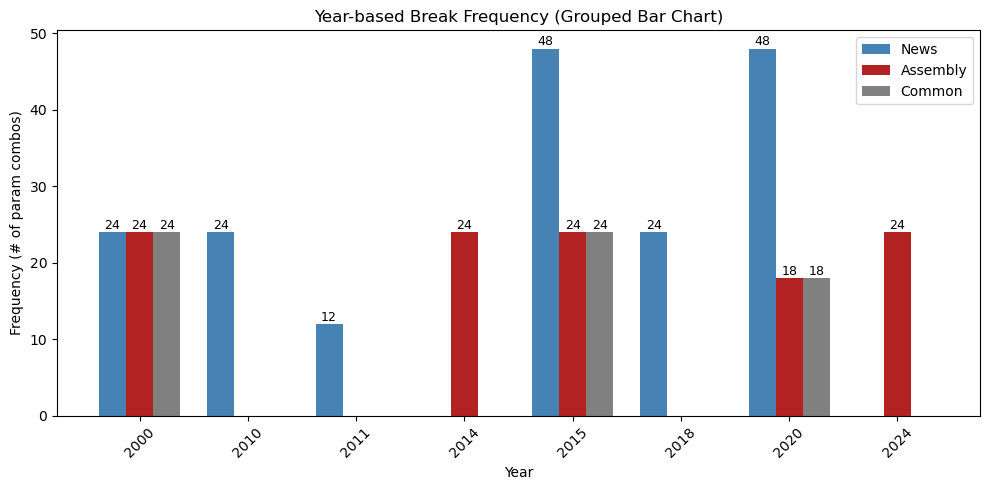

In [59]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_break_frequency_bar_complex(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="figure_B2_bar.png"
):
    """
    변곡점 등장빈도를 '그룹화된 막대(bar) 차트'로 표현.
      - X축: 연도
      - Y축: 빈도 (해당 연도 변곡점이 몇 개 파라미터조합에서 검출되었는가?)
      - 막대 3개: News / Assembly / Common
    """

    # 1) 엑셀 로드
    df = pd.read_excel(excel_path)

    # 2) 변곡점 빈도 계산
    news_c  = Counter()
    assem_c = Counter()
    comm_c  = Counter()

    for row in df.itertuples():
        # news_breaks, assem_breaks, common_breaks 열에 문자열이 들어있다면 파이썬 리스트로 변환
        nb = ast.literal_eval(row.news_breaks)   if isinstance(row.news_breaks,  str) else []
        ab = ast.literal_eval(row.assem_breaks)  if isinstance(row.assem_breaks, str) else []
        cb = ast.literal_eval(row.common_breaks) if isinstance(row.common_breaks,str) else []

        for y in nb: news_c[y] += 1
        for y in ab: assem_c[y] += 1
        for y in cb: comm_c[y]  += 1

    # 전체 연도 세트
    all_years = sorted(set(news_c.keys()) | set(assem_c.keys()) | set(comm_c.keys()))
    if not all_years:
        print("※ 변곡점이 전혀 검출되지 않아, 그릴 데이터가 없습니다.")
        return

    # 3) 년도별 각 빈도 리스트화
    news_vals  = [news_c[y]  for y in all_years]
    assem_vals = [assem_c[y] for y in all_years]
    comm_vals  = [comm_c[y]  for y in all_years]

    # 4) 그룹화된 막대차트 그리기
    x = np.arange(len(all_years))        # x 좌표는 0,1,2,... 
    width = 0.25                         # 막대 폭

    plt.figure(figsize=(10,5))           # 좀 더 가로를 넓게
    # 각 막대 위치 = x + 오프셋
    bar_news  = plt.bar(x - width, news_vals,  width=width, color='steelblue', label='News')
    bar_assem = plt.bar(x,          assem_vals,width=width, color='firebrick', label='Assembly')
    bar_comm  = plt.bar(x + width,  comm_vals, width=width, color='gray', label='Common')

    # 5) 막대 위에 값 표시(autolabel)
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            # height가 0이면 표시 안 해도 되고, 표시하려면 아래처럼
            if height > 0:
                plt.text(
                    rect.get_x() + rect.get_width()/2.,   # 막대의 중앙
                    height + 0.05,                        # 약간 위
                    f"{height:.0f}",                      # 정수 표시
                    ha='center', va='bottom', fontsize=9, color='black'
                )
    autolabel(bar_news)
    autolabel(bar_assem)
    autolabel(bar_comm)

    # 6) X축 연도 라벨 설정 (각 x 위치에 all_years)
    plt.xticks(x, all_years, rotation=45)
    plt.xlabel("Year")
    plt.ylabel("Frequency (# of param combos)")
    plt.title("Year-based Break Frequency (Grouped Bar Chart)")
    plt.legend()
    plt.tight_layout()

    # 저장 & 표시
    plt.savefig(output_fig, dpi=300)
    print(f"✅ Saved bar chart -> {output_fig}")
    plt.show()

# 만약 직접 실행하려면 아래 주석 해제
plot_break_frequency_bar_complex()


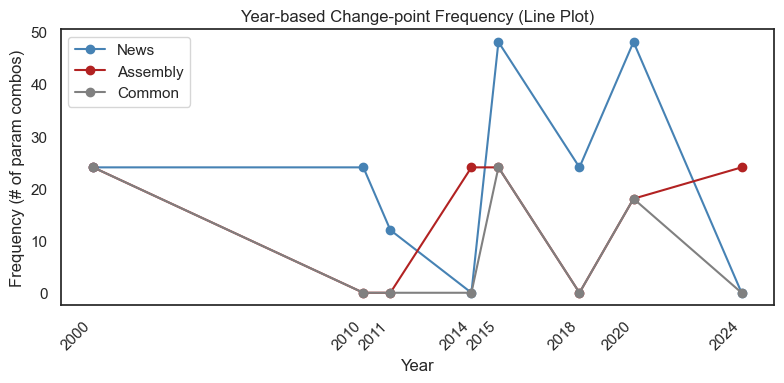

In [74]:
import pandas as pd, ast, matplotlib.pyplot as plt
from collections import Counter

def plot_break_frequency_line(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="figure_B2_line.png"
):
    df = pd.read_excel(excel_path)

    news_c, assem_c, comm_c = Counter(), Counter(), Counter()
    for r in df.itertuples():
        nb = ast.literal_eval(r.news_breaks)  if r.news_breaks  else []
        ab = ast.literal_eval(r.assem_breaks) if r.assem_breaks else []
        cb = ast.literal_eval(r.common_breaks) if r.common_breaks else []
        for y in nb: news_c[y]  += 1
        for y in ab: assem_c[y] += 1
        for y in cb: comm_c[y]  += 1

    years = sorted(set(news_c)|set(assem_c)|set(comm_c))
    news_vals  = [news_c[y]  for y in years]
    assem_vals = [assem_c[y] for y in years]
    comm_vals  = [comm_c[y]  for y in years]

    plt.figure(figsize=(8, 4))
    plt.plot(years, news_vals,  marker='o', color='steelblue', label='News')
    plt.plot(years, assem_vals, marker='o', color='firebrick', label='Assembly')
    plt.plot(years, comm_vals,  marker='o', color='gray',    label='Common')

    plt.xticks(years, rotation=45, ha='right')   # ← 연도 겹침 방지
    plt.xlabel("Year")
    plt.ylabel("Frequency (# of param combos)")
    plt.title("Year-based Change-point Frequency (Line Plot)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    plt.show()

# 실행
plot_break_frequency_line()


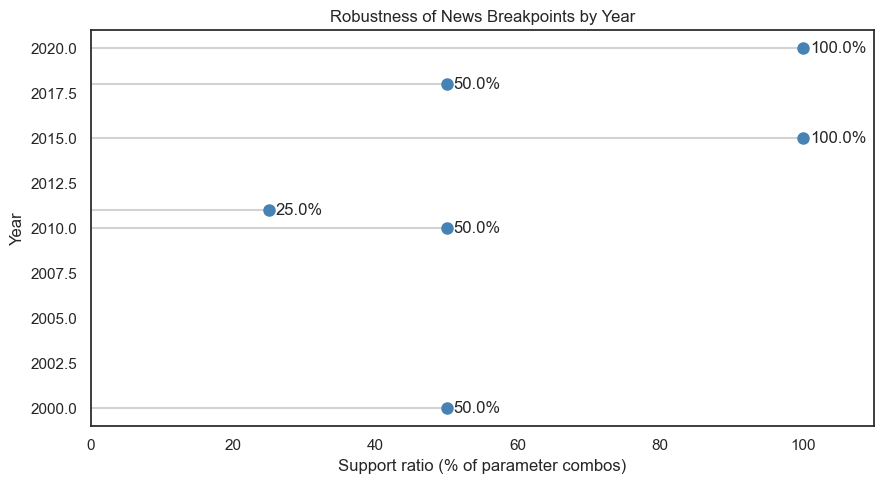

In [68]:
import pandas as pd, ast, matplotlib.pyplot as plt
from collections import Counter

def plot_support_ratio(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="figure_support_ratio.png"
):
    df = pd.read_excel(excel_path)
    total_combo = len(df)

    # 연도별 카운트
    news_c = Counter()
    for s in df['news_breaks']:
        if isinstance(s, str) and s.strip():
            for y in ast.literal_eval(s):
                news_c[y] += 1

    years, counts, ratios = [], [], []
    for y in sorted(news_c):
        years.append(y)
        counts.append(news_c[y])
        ratios.append(news_c[y]/total_combo*100)

    # —― 그리기 ―—
    plt.figure(figsize=(9, 5))
    plt.hlines(y=years, xmin=0, xmax=ratios, color='lightgray')
    plt.plot(ratios, years, "o", color='steelblue', markersize=8)

    for x, y in zip(ratios, years):
        plt.text(x+1, y, f"{x:.1f}%", va='center')

    plt.xlabel("Support ratio (% of parameter combos)")
    plt.ylabel("Year")
    plt.title("Robustness of News Breakpoints by Year")
    plt.xlim(0, max(ratios)*1.1)
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    plt.show()
plot_support_ratio()


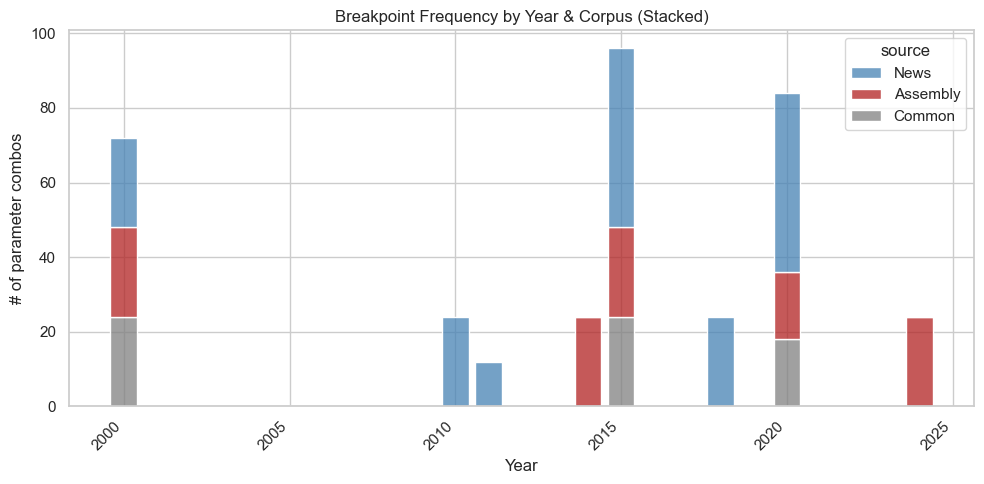

In [69]:
import pandas as pd, ast, seaborn as sns, matplotlib.pyplot as plt

def plot_stacked_histogram(
    excel_path=r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig="figure_stacked_hist.png"
):
    df = pd.read_excel(excel_path)

    # ―― 1) long-form 데이터로 변환 ――
    records = []
    for _, row in df.iterrows():
        for y in ast.literal_eval(row['news_breaks']) if row['news_breaks'] else []:
            records.append({"year": y, "source": "News"})
        for y in ast.literal_eval(row['assem_breaks']) if row['assem_breaks'] else []:
            records.append({"year": y, "source": "Assembly"})
        for y in ast.literal_eval(row['common_breaks']) if row['common_breaks'] else []:
            records.append({"year": y, "source": "Common"})
    long_df = pd.DataFrame(records)

    # ―― 2) 시각화 ――
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=long_df,
        x="year",
        hue="source",
        multiple="stack",     # ← 누적 막대
        shrink=0.8,           # 막대 간격
        discrete=True,        # 연산 없이 1:1 빈도
        palette={"News":"steelblue", "Assembly":"firebrick", "Common":"gray"}
    )
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Year")
    plt.ylabel("# of parameter combos")
    plt.title("Breakpoint Frequency by Year & Corpus (Stacked)")
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    plt.show()

plot_stacked_histogram()

✅ 히트맵 저장 완료 → heatmap_news_breaks_binary.png


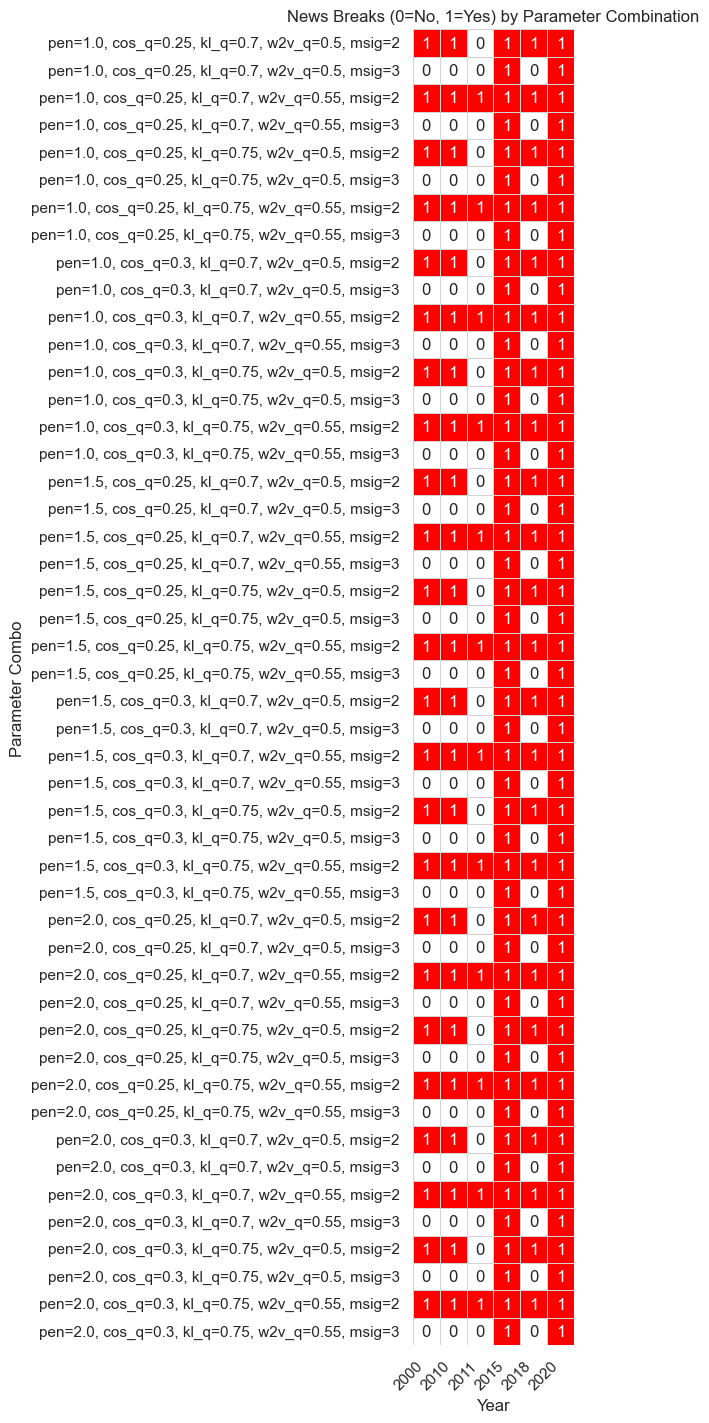

In [63]:
import pandas as pd, ast, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.colors import ListedColormap

def plot_heatmap_binary_discrete(
    excel_path = r"C:\Users\Administrator\Desktop\변곡점찾기\민감도 분석\sensitivity_results_grid.xlsx",
    output_fig = "heatmap_news_breaks_binary.png"
):
    # 1) 엑셀 읽기
    df = pd.read_excel(excel_path)

    # 2) 파라미터 조합 라벨 만들기
    df["param_label"] = (
        "pen="      + df["pen"].astype(str)
        + ", cos_q=" + df["cos_q"].astype(str)
        + ", kl_q="  + df["kl_q"].astype(str)
        + ", w2v_q=" + df["w2v_q"].astype(str)
        + ", msig="  + df["min_signals"].astype(str)
    )

    # 3) 뉴스 변곡점 연도 전체 집합
    all_years = set()
    for s in df["news_breaks"]:
        if isinstance(s, str) and s.strip():
            all_years.update(ast.literal_eval(s))
    if not all_years:
        print("※ 뉴스 변곡점이 하나도 없습니다.")
        return
    years_sorted = sorted(all_years)

    # 4) 0 · 1 매트릭스 생성
    matrix = []
    for s in df["news_breaks"]:
        nb = ast.literal_eval(s) if isinstance(s, str) and s.strip() else []
        matrix.append([1 if y in nb else 0 for y in years_sorted])
    mat_array = np.array(matrix)

    # 5) 2색 컬러맵 (0=white, 1=red)
    cmap_bin = ListedColormap(["white", "red"])

    # 6) 히트맵
    sns.set_theme(style="white")
    plt.figure(figsize=(max(6, len(years_sorted)*0.6), max(4, len(df)*0.3)))
    sns.heatmap(
        mat_array,
        cmap=cmap_bin,
        vmin=0, vmax=1,
        cbar=False,          # 굳이 색막대 필요 없음
        annot=True, fmt="d", # 0/1 숫자 표기
        linewidths=.4,
        linecolor="lightgray",
        xticklabels=years_sorted,
        yticklabels=df["param_label"]
    )
    plt.title("News Breaks (0=No, 1=Yes) by Parameter Combination")
    plt.xlabel("Year")
    plt.ylabel("Parameter Combo")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(output_fig, dpi=300)
    print(f"✅ 히트맵 저장 완료 → {output_fig}")
    plt.show()

# ───── 실행 예시 ─────
plot_heatmap_binary_discrete()
